Data from the Taiwan Economic Journal for the years 1999–2009 representing company bankruptcy based on the business regulations of the Taiwan Stock Exchange<br>

A. Objective:
1. Positive Classification (Bankruptcy Case): Companies that experienced bankruptcy in accordance with the business regulations of the Taiwan Stock Exchange during the period
2. Negative Classification (Non-Bankruptcy): Companies that did not experience bankruptcy in accordance with the business regulations of the Taiwan Stock Exchange during the period.

B. Preprocessing:<br>
Technique : Binary Classification<br>
Features Selection: Top 10 Features from `mutual_info_classif`<br>
Scaling : `RobustScaler`<br>
Metric Evaluation:<br>
1. With SMOOTE Metric Evaluation AUC-ROC<br>
2. Without SMOOTE, Metric Evaluation AUC-PR, G-Mean

C. Train and Test Model:
1. Logistic Regression
2. KNeighbors Classifier
3. Naive Bayes
4. Decission Tree Classifier
5. Random Forest Classifier
6. XGB Classifier
7. CatBoost Classifier
8. Light GBM Classifier
9. SVM

D. Conclusion:<br>
The best model to predict company bankruptcy is: LogisticRegression and evaluation metric AUC-ROC with value 92.6%

E. Recomendation:<br>
Model can be used to analyze a company's financial risk by identifying factors that contribute to bankruptcy and providing valuable information for risk mitigation. So for companies that avoid the possibility of bankruptcy, the recommendation is to increase the value of  `Persistent EPS in the Last Four Seasons`,`Net profit before tax/Paid-in capital`,`Per Share Net profit before tax (Yuan ¥)`,`Net Income to Total Assets`and `Equity to Liability`


Explanation:
1. Why used `Binary Classification`?<br>
In the case of bankruptcy prediction, the goal is very clear, namely to predict whether a company will experience bankruptcy (high risk) or not. With the binary classification approach, the model can provide clear decisions based on certain probabilities and thresholds
2. Why used `mutual_info_classif`?<br>
Mutual information is usually used in feature selection, where I try to select a subset of features that are most informative or important for the classification task. Features that have high mutual information with the target variable tend to be more relevant in making predictions. and from here I only choose a few features that have the highest scores, with the aim of reducing the possibility of overfitting
3. Why used `RobustScaler`?<br>
Due to the large number of outliers in the dataset
4. Why used SMOOTE and metric evaluation AUC-ROC?<br>
It provides a view of a model's performance across different decision thresholds. A high AUC-ROC indicates that the model can effectively distinguish between the two classes
5. Why used without SMOOTE and metric evaluation AUC-PR?<br>
AUC Precision-Recall is particularly useful when dealing with imbalanced datasets and more focus on the performance of the positive class (the minority class).
6. Why used without SMOOTE and metric evaluation G-Mean?<br>
It takes both sensitivity (true positive rate) and specificity (true negative rate) into account. This makes it a suitable metric when I want to balance the performance between classes, and I don't want one class to dominate the evaluation


#Load Data

##Import the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Import the Dataset

In [2]:
data = pd.read_csv("bankruptcy.csv")
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

##Copy the Data

In [3]:
import copy
data1 = copy.deepcopy(data)
data1 = pd.DataFrame(data1)

#Understanding Dataset

In [4]:
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
data.head()

Bankrupt   ROA(C) before interest and depreciation before interest  \
0         1                                           0.370594          
1         1                                           0.464291          
2         1                                           0.426071          
3         1                                           0.399844          
4         1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                              

##Check Data Type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.shape

(6819, 96)

##Check Missing Value

In [7]:
data.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
data1_nan = data1[data1.isna().any(axis=1)]

##Check Dupicate Data

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe().T

count      mean  \
Bankrupt                                            6819.0  0.032263   
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
...                                                    ...       ...   
 Liability to Equity                                6819.0  0.280365   
 Degree of Financial Leverage (DFL)                 6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to E...  6819.0  0.565358   
 Net Income Flag                                    6819.0  1.000000   
 Equity to Liability                                6819.0  0.047578   

                                                         std  min       25%  \
Bankrupt                                            0.176710  0.0  0.000000   
 ROA(C) before interest and depreciation before...  0.060686  0.0  0.476527   
 ROA(A) before interest and % after tax             0.065620  0.0  0.535543   
 ROA(B) before interest and depreciation after tax  0.061595  0.0  0.527277   
 Operating Gross Margin                             0.016934  0.0  0.600445   
...                                                      ...  ...       ...   
 Liability to Equity                                0.014463  0.0  0.276944   
 Degree of Financial Leverage (DFL)                 0.015668  0.0  0.026791   
 Interest Coverage Ratio (Interest expense to E...  0.013214  0.0  0.565158   
 Net Income Flag                                    0.000000  1.0  1.000000   
 Equity to Liability                                0.050014  0.0  0.024477   

                                                         50%       75%  max  
Bankrupt                                            0.000000  0.000000  1.0  
 ROA(C) before interest and depreciation before...  0.502706  0.535563  1.0  
 ROA(A) before interest and % after tax             0.559802  0.589157  1.0  
 ROA(B) before interest and depreciation after tax  0.552278  0.584105  1.0  
 Operating Gross Margin                             0.605997  0.613914  1.0  
...                                                      ...       ...  ...  
 Liability to Equity                                0.278778  0.281449  1.0  
 Degree of Financial Leverage (DFL)                 0.026808  0.026913  1.0  
 Interest Coverage Ratio (Interest expense to E...  0.565252  0.565725  1.0  
 Net Income Flag                                    1.000000  1.000000  1.0  
 Equity to Liability                                0.033798  0.052838  1.0  

[96 rows x 8 columns]

#Feature Selection

In [11]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [12]:
# separate train and test sets for AUC Precissio-Recall and G-Mean
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [13]:
# separate train and test sets for AUC Precissio-Recall and G-Mean
X_trains, X_tests, y_trains, y_tests = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_trains.shape, X_tests.shape

((4773, 95), (2046, 95))

In [14]:
# calculate the mutual information between the variables and the target
mi = mutual_info_classif(X_train, y_train)
mi

array([0.0303555 , 0.03391891, 0.03045162, 0.01554765, 0.01620547,
       0.0212079 , 0.03076214, 0.02862244, 0.03107995, 0.03712235,
       0.        , 0.        , 0.0133913 , 0.00447269, 0.02067542,
       0.03117425, 0.02947497, 0.02784137, 0.0420403 , 0.00582187,
       0.00126982, 0.02167365, 0.04335516, 0.00836157, 0.00675588,
       0.01204086, 0.0097299 , 0.01056395, 0.01433811, 0.        ,
       0.01395521, 0.00078416, 0.0135231 , 0.00430281, 0.03459601,
       0.01691269, 0.0344813 , 0.03487626, 0.01058352, 0.0398663 ,
       0.00206903, 0.02423729, 0.04336626, 0.00517205, 0.01222572,
       0.        , 0.00173319, 0.00248229, 0.00335921, 0.        ,
       0.        , 0.02271382, 0.00125667, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.00358257, 0.0035659 , 0.01610328,
       0.01731491, 0.02303233, 0.        , 0.00302075, 0.02232087,
       0.02399633, 0.00271325, 0.03457833, 0.03417276, 0.00907948,
       0.        , 0.00022256, 0.01903018, 0.00212838, 0.00387

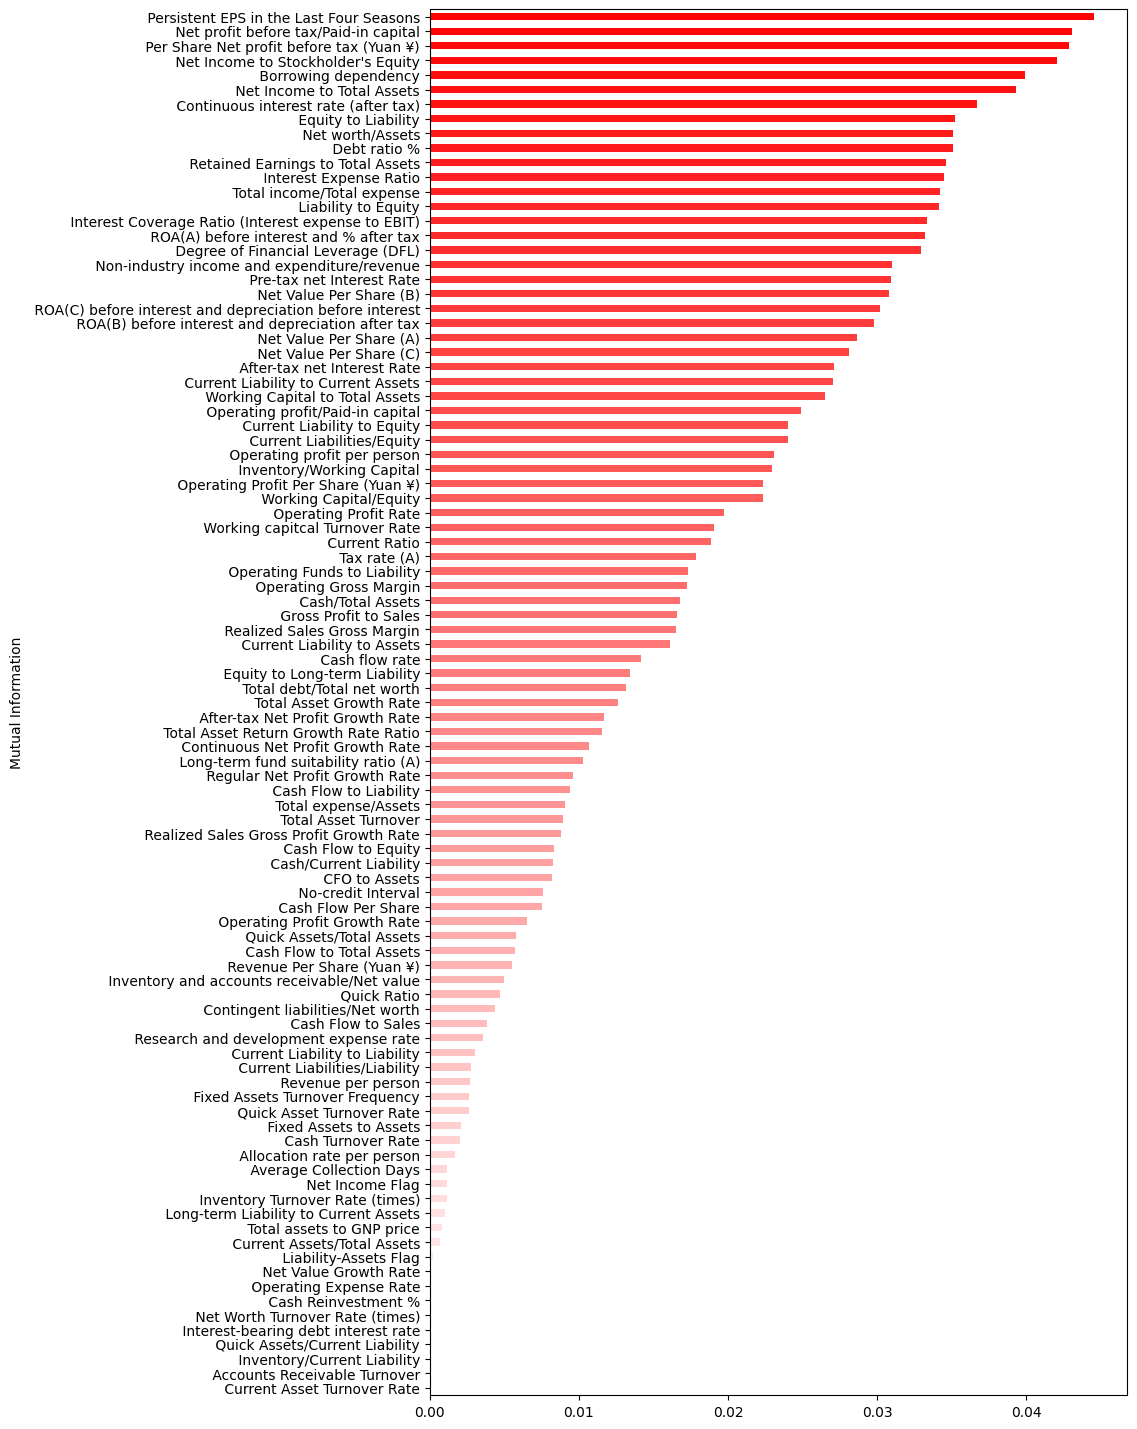

In [15]:
import matplotlib.pyplot as plt

mi = pd.Series(mi)
mi.index = X_train.columns
num_colors = len(mi)
custom_palette = ['#FF0000' + '{:02X}'.format(int(255 * i / num_colors)) for i in range(num_colors)]
mi.sort_values(ascending=True).plot.barh(figsize=(9, 18), color=custom_palette)
plt.ylabel('Mutual Information')
plt.show()

Observation:<br>
From the results above, it shows which data has more information about the target (Bankrupt). So I will take the 10 features with the highest scores for subsequent analysis

#Exploratory Data Analysis

In [15]:
main = data1_nan.loc[:, (data1_nan.dtypes == int) | (data1_nan.dtypes == float)].columns.tolist()
main = [' Persistent EPS in the Last Four Seasons',
           ' Net profit before tax/Paid-in capital',
           ' Per Share Net profit before tax (Yuan ¥)',
           " Net Income to Stockholder's Equity",
           ' Borrowing dependency',
           ' Net Income to Total Assets',
           ' Continuous interest rate (after tax)',
           ' Equity to Liability',
           ' Net worth/Assets',
           ' Debt ratio %',
           'Bankrupt?'
]

In [16]:
data1[main].describe().T

count      mean       std  min  \
 Persistent EPS in the Last Four Seasons   6819.0  0.228813  0.033263  0.0   
 Net profit before tax/Paid-in capital     6819.0  0.182715  0.030785  0.0   
 Per Share Net profit before tax (Yuan ¥)  6819.0  0.184361  0.033180  0.0   
 Net Income to Stockholder's Equity        6819.0  0.840402  0.014523  0.0   
 Borrowing dependency                      6819.0  0.374654  0.016286  0.0   
 Net Income to Total Assets                6819.0  0.807760  0.040332  0.0   
 Continuous interest rate (after tax)      6819.0  0.781381  0.012679  0.0   
 Equity to Liability                       6819.0  0.047578  0.050014  0.0   
 Net worth/Assets                          6819.0  0.886823  0.053920  0.0   
 Debt ratio %                              6819.0  0.113177  0.053920  0.0   
Bankrupt?                                  6819.0  0.032263  0.176710  0.0   

                                                25%       50%       75%  max  
 Persistent EPS in the Last Four Seasons   0.214711  0.224544  0.238820  1.0  
 Net profit before tax/Paid-in capital     0.169376  0.178456  0.191607  1.0  
 Per Share Net profit before tax (Yuan ¥)  0.170370  0.179709  0.193493  1.0  
 Net Income to Stockholder's Equity        0.840115  0.841179  0.842357  1.0  
 Borrowing dependency                      0.370168  0.372624  0.376271  1.0  
 Net Income to Total Assets                0.796750  0.810619  0.826455  1.0  
 Continuous interest rate (after tax)      0.781567  0.781635  0.781735  1.0  
 Equity to Liability                       0.024477  0.033798  0.052838  1.0  
 Net worth/Assets                          0.851196  0.888593  0.927109  1.0  
 Debt ratio %                              0.072891  0.111407  0.148804  1.0  
Bankrupt?                                  0.000000  0.000000  0.000000  1.0

In [17]:
subset_data = data1[main]

##Univariate Analysis

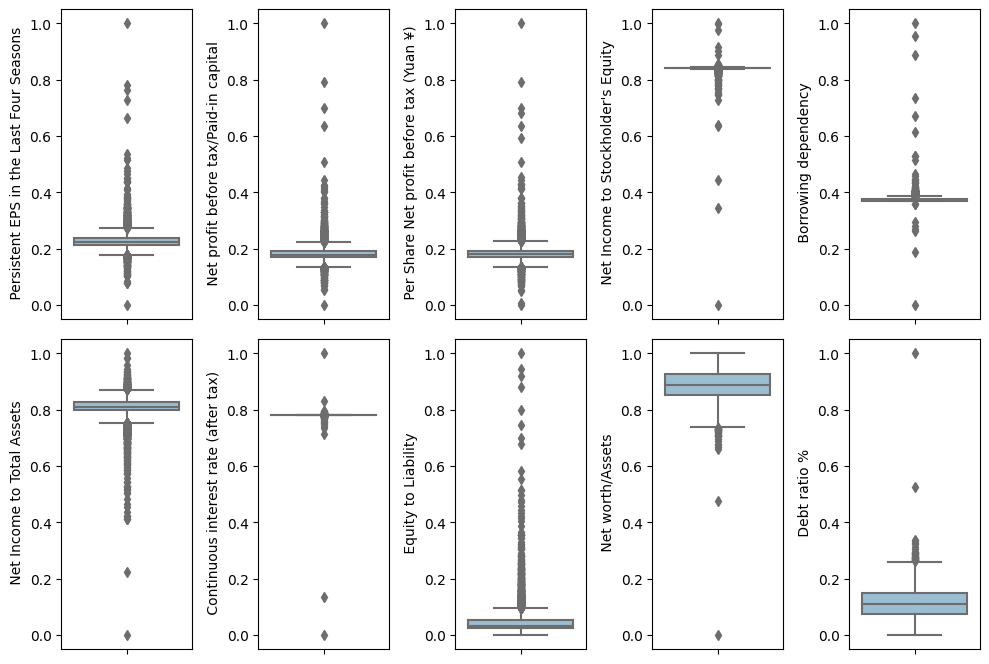

In [ ]:
# chek distribution data dan outlier using boxplot
if 'Bankrupt' in main:
  main.remove('Bankrupt')

plt.figure(figsize=(10, 10))
for i in range(0, len(main)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=data1[main[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

Observation:<br>
From all data, the outlier still normal

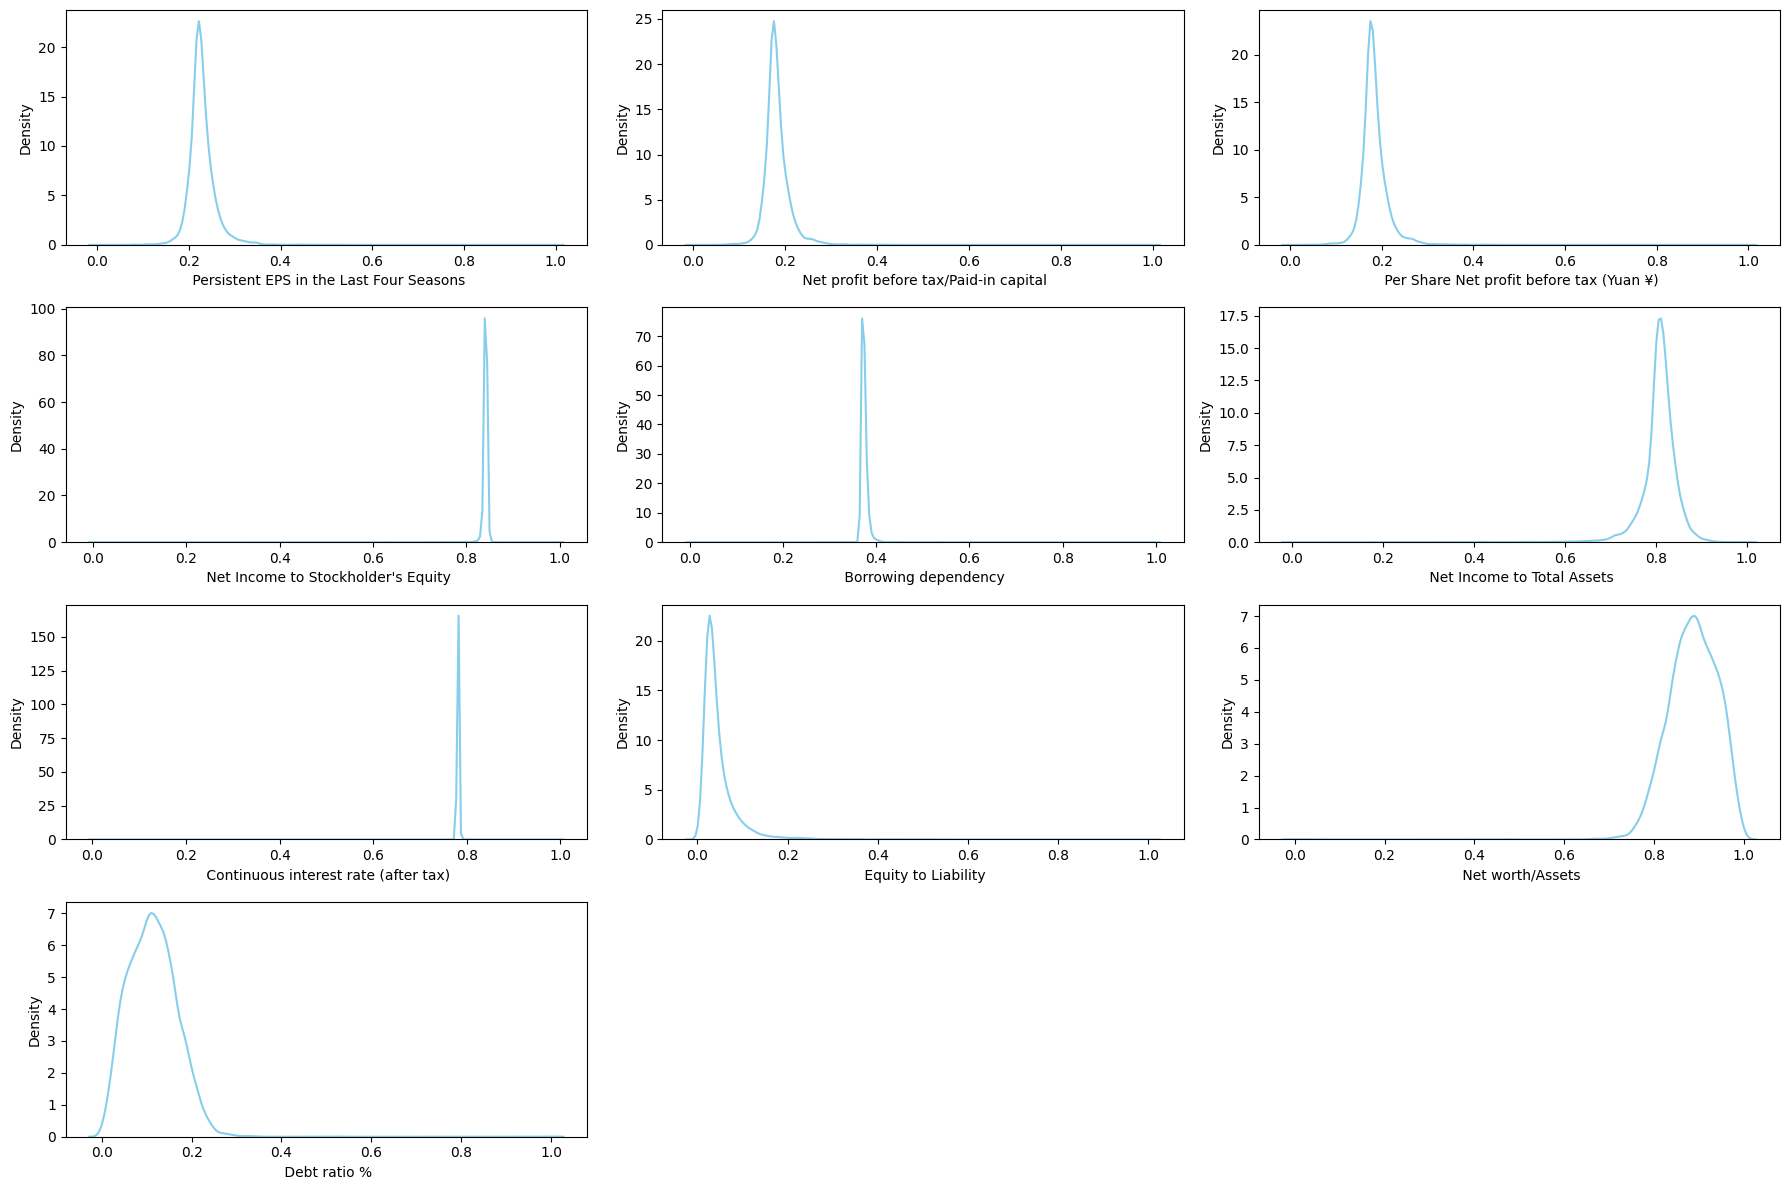

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(18,12))

features = main
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    sns.kdeplot(x=data1[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:<br>
All data shows a normal distribution

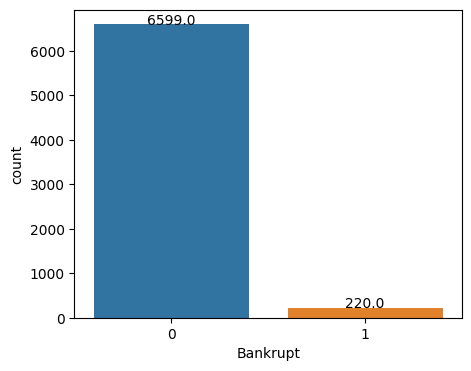

0    6599
1     220
Name: Bankrupt, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Bankrupt', data=data)

# Menambahkan label ke setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()
print(data['Bankrupt'].value_counts())

Observation:<br>
The target has imbalance data

##Multivariate Analysis

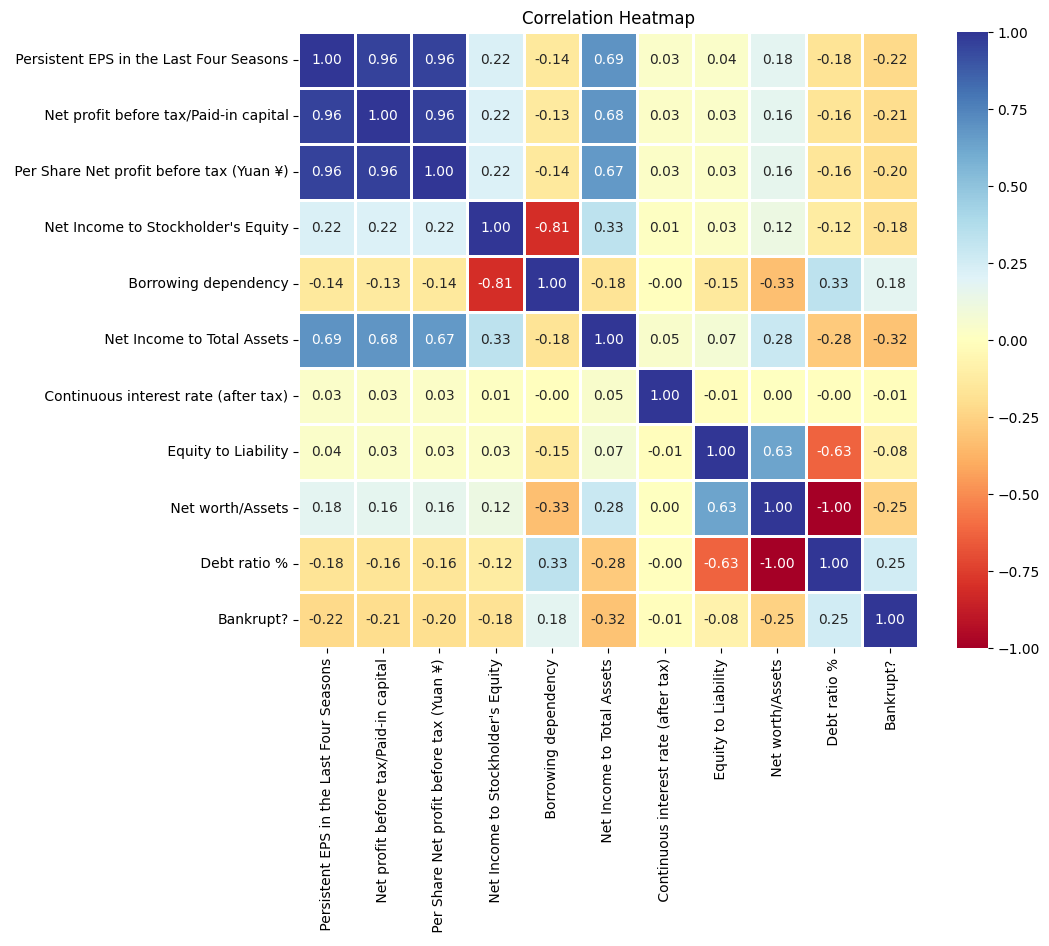

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(subset_data.corr(), annot=True, cmap='RdYlBu', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

##Bivariate Analysis

<Figure size 2100x5000 with 0 Axes>

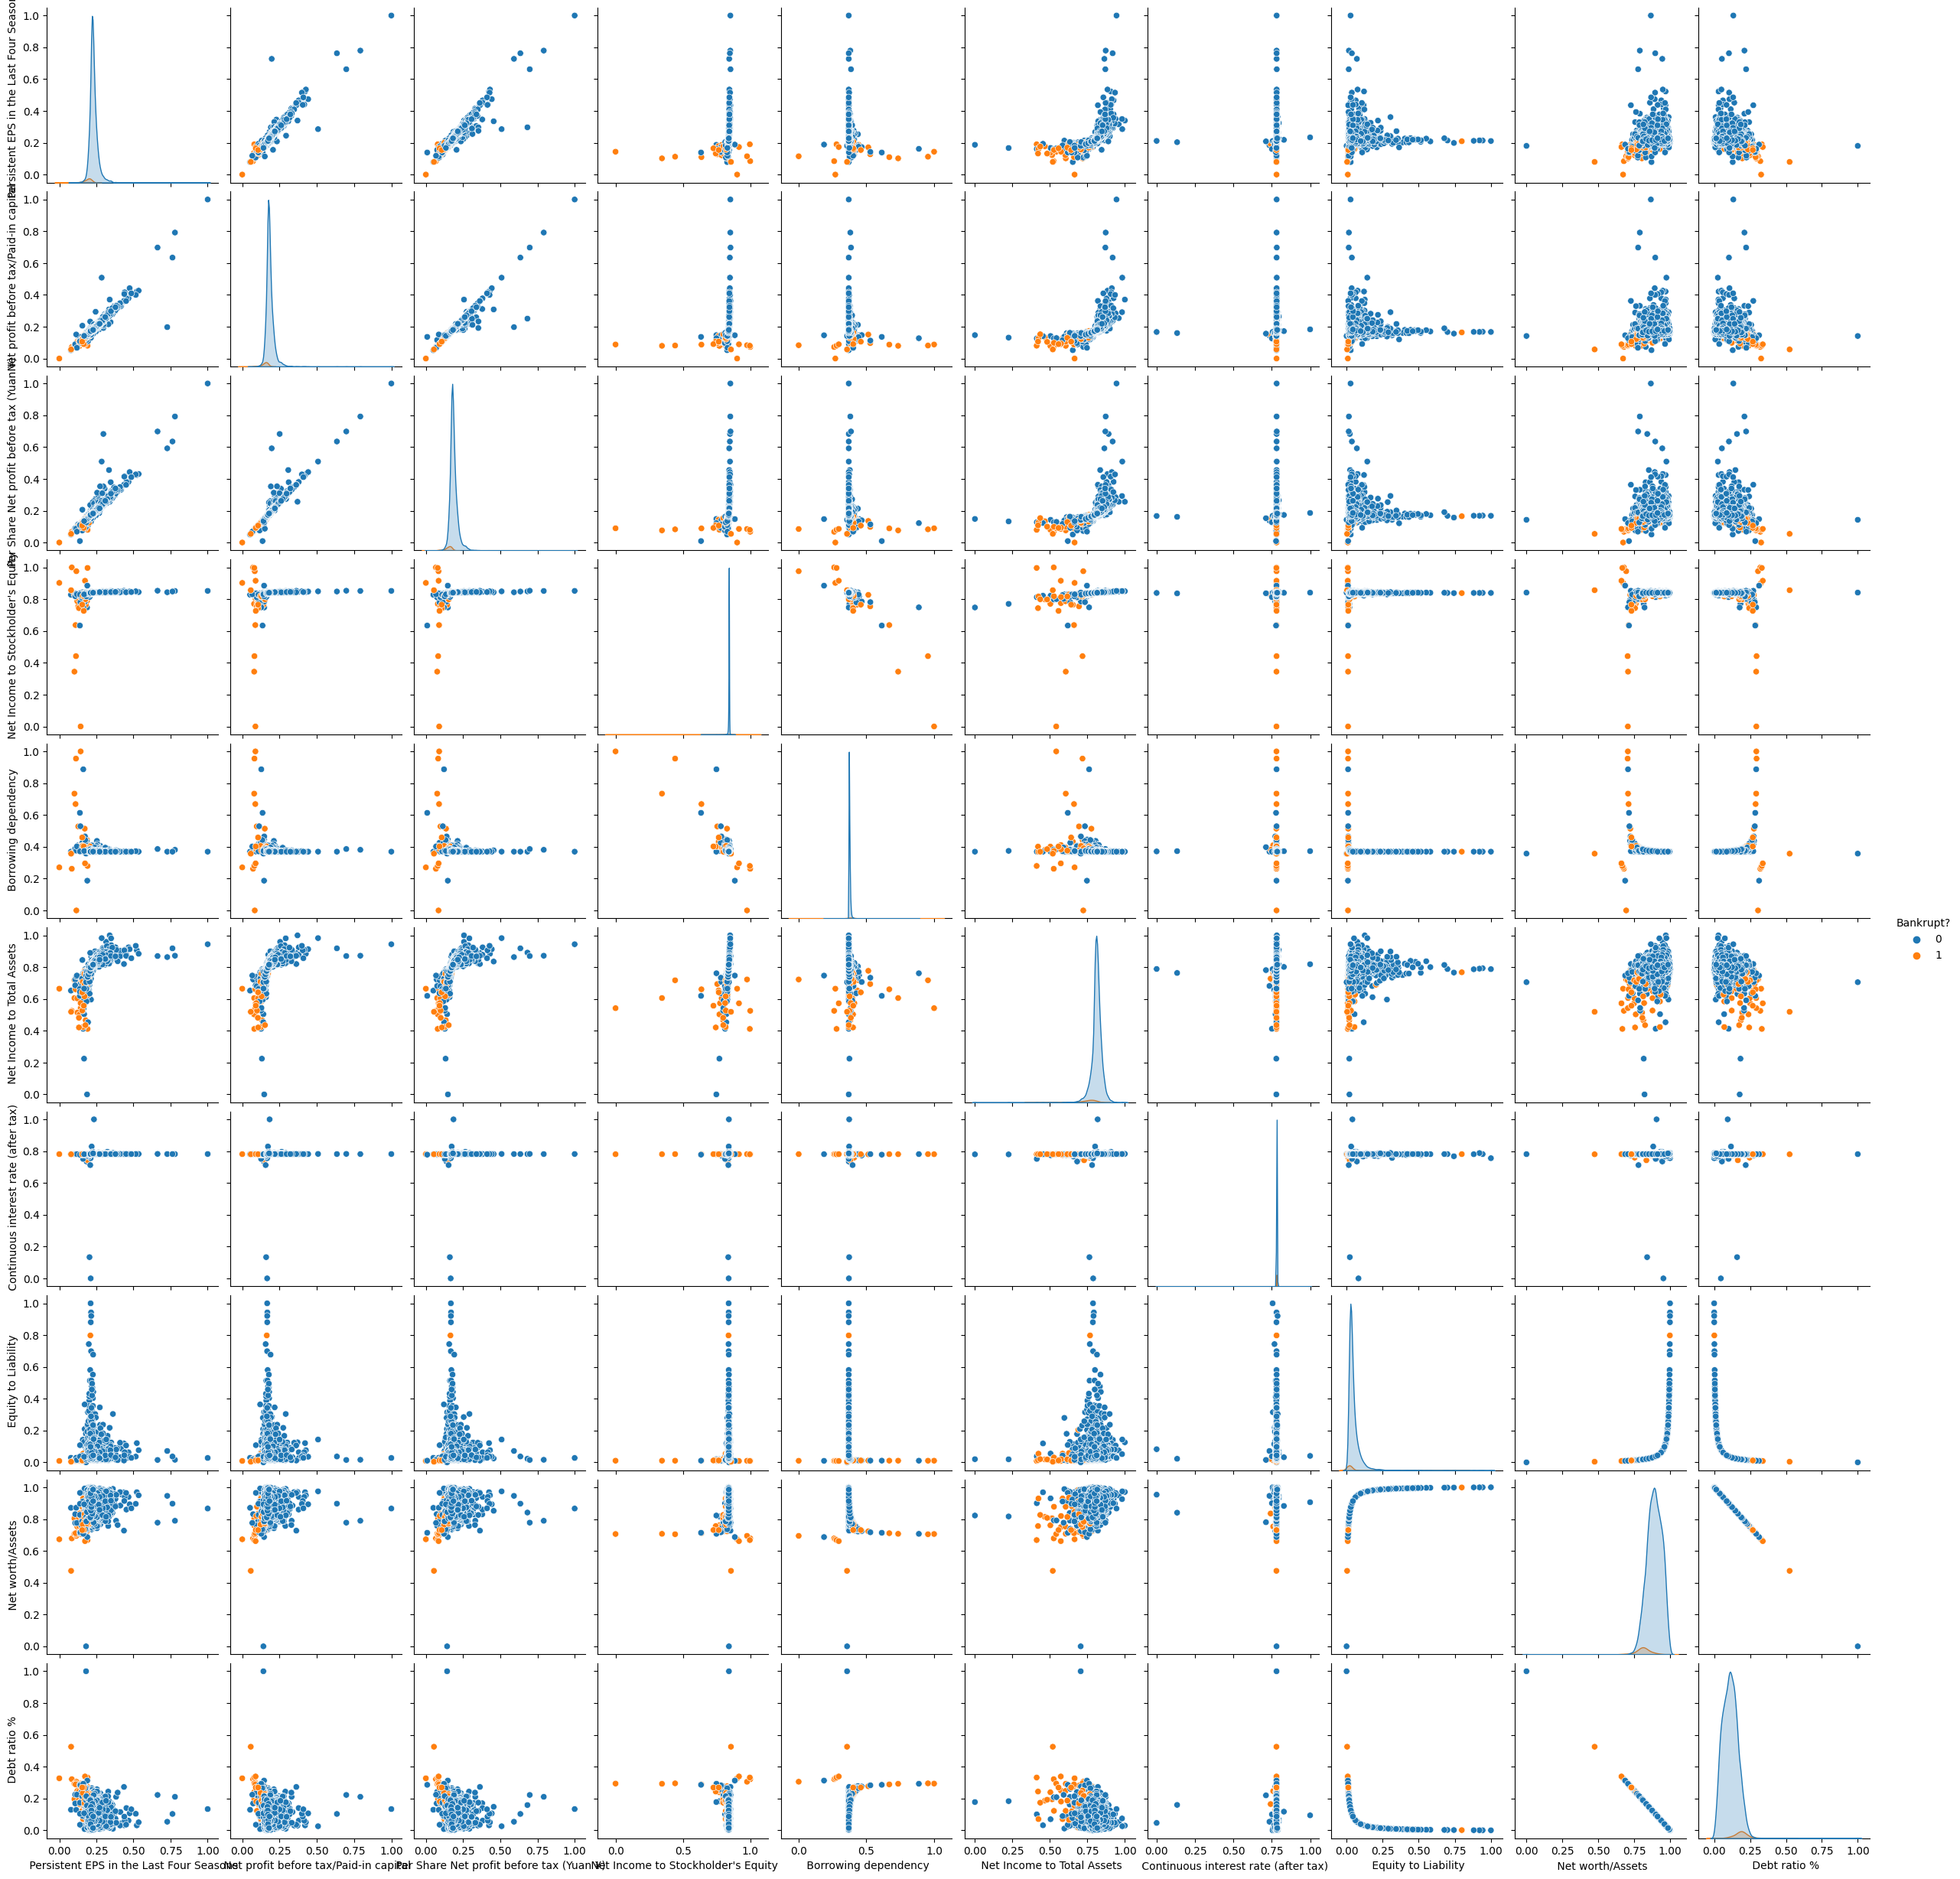

In [ ]:
plt.figure(figsize=(21,50))
sns.pairplot(subset_data, hue='Bankrupt?')
plt.show()

Observation:<br>
The higher value of `Persistent EPS in the Last Four Seasons`,`Net profit before tax/Paid-in capital`,`Per Share Net profit before tax (Yuan ¥)`,`Net Income to Total Assets`and `Equity to Liability` more greater the tendency is 0

<ipython-input-22-739b34e3a59a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)


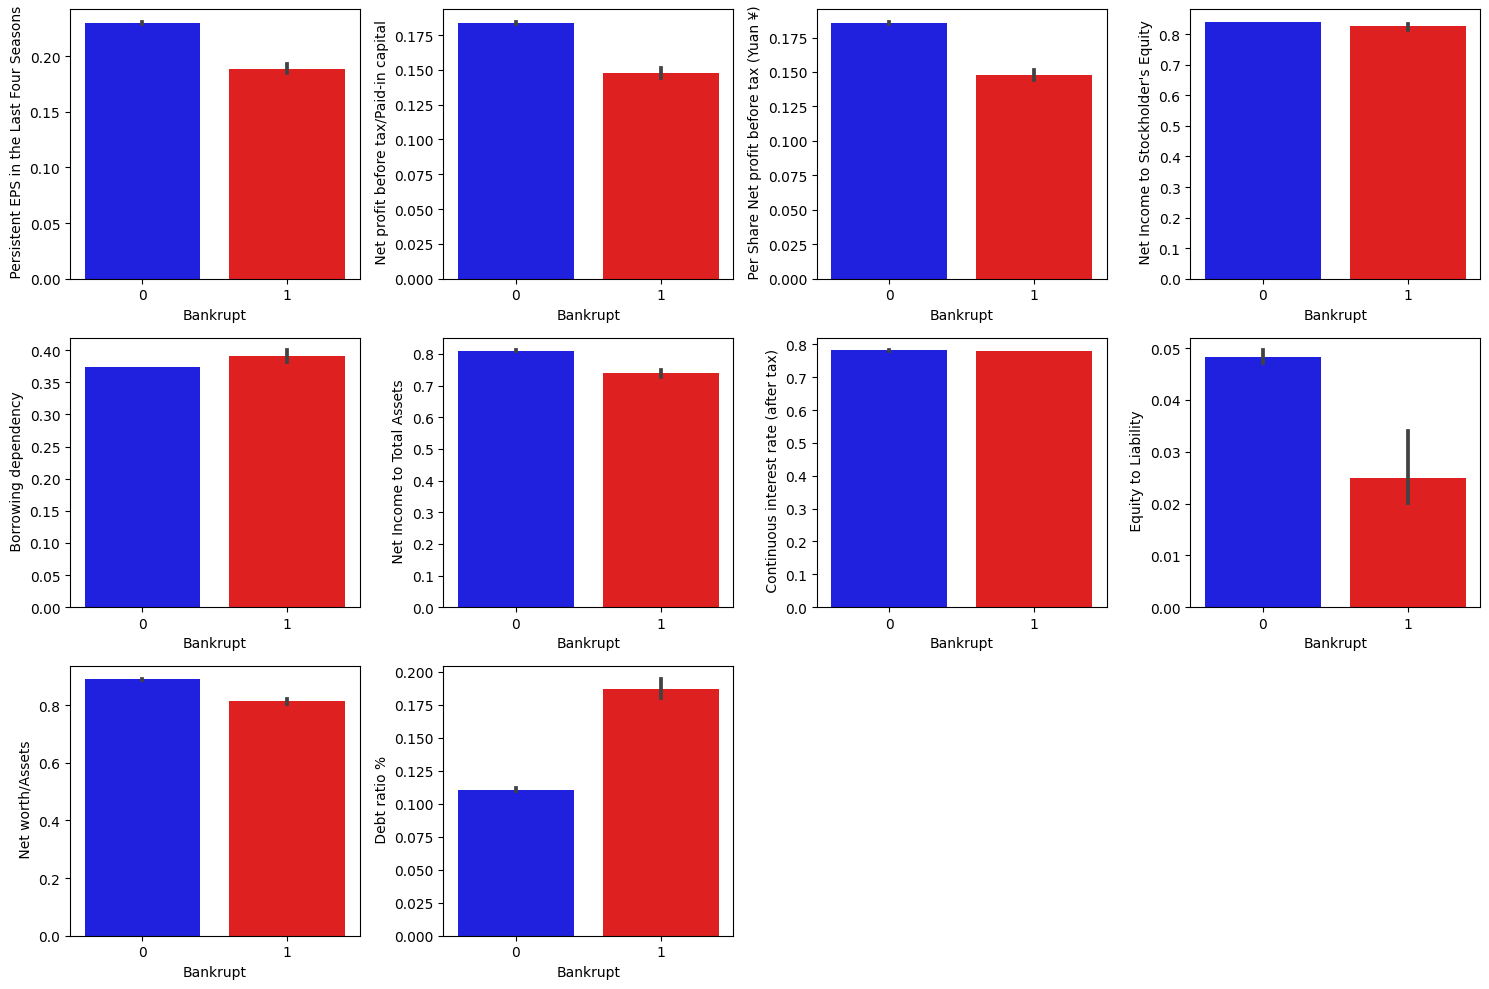

In [ ]:
# Rename the 'Bankrupt?' column to 'Bankrupt' (without the question mark)
subset_data.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

# Create subplots for bar charts
plt.figure(figsize=(15, 10))
for i, feature in enumerate(main[:-1]):  # Exclude the target variable
    plt.subplot(3, 4, i + 1)

    # Create bar charts for each class
    sns.barplot(x='Bankrupt', y=feature, data=subset_data, palette=['blue', 'red'])

    plt.xlabel('Bankrupt')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

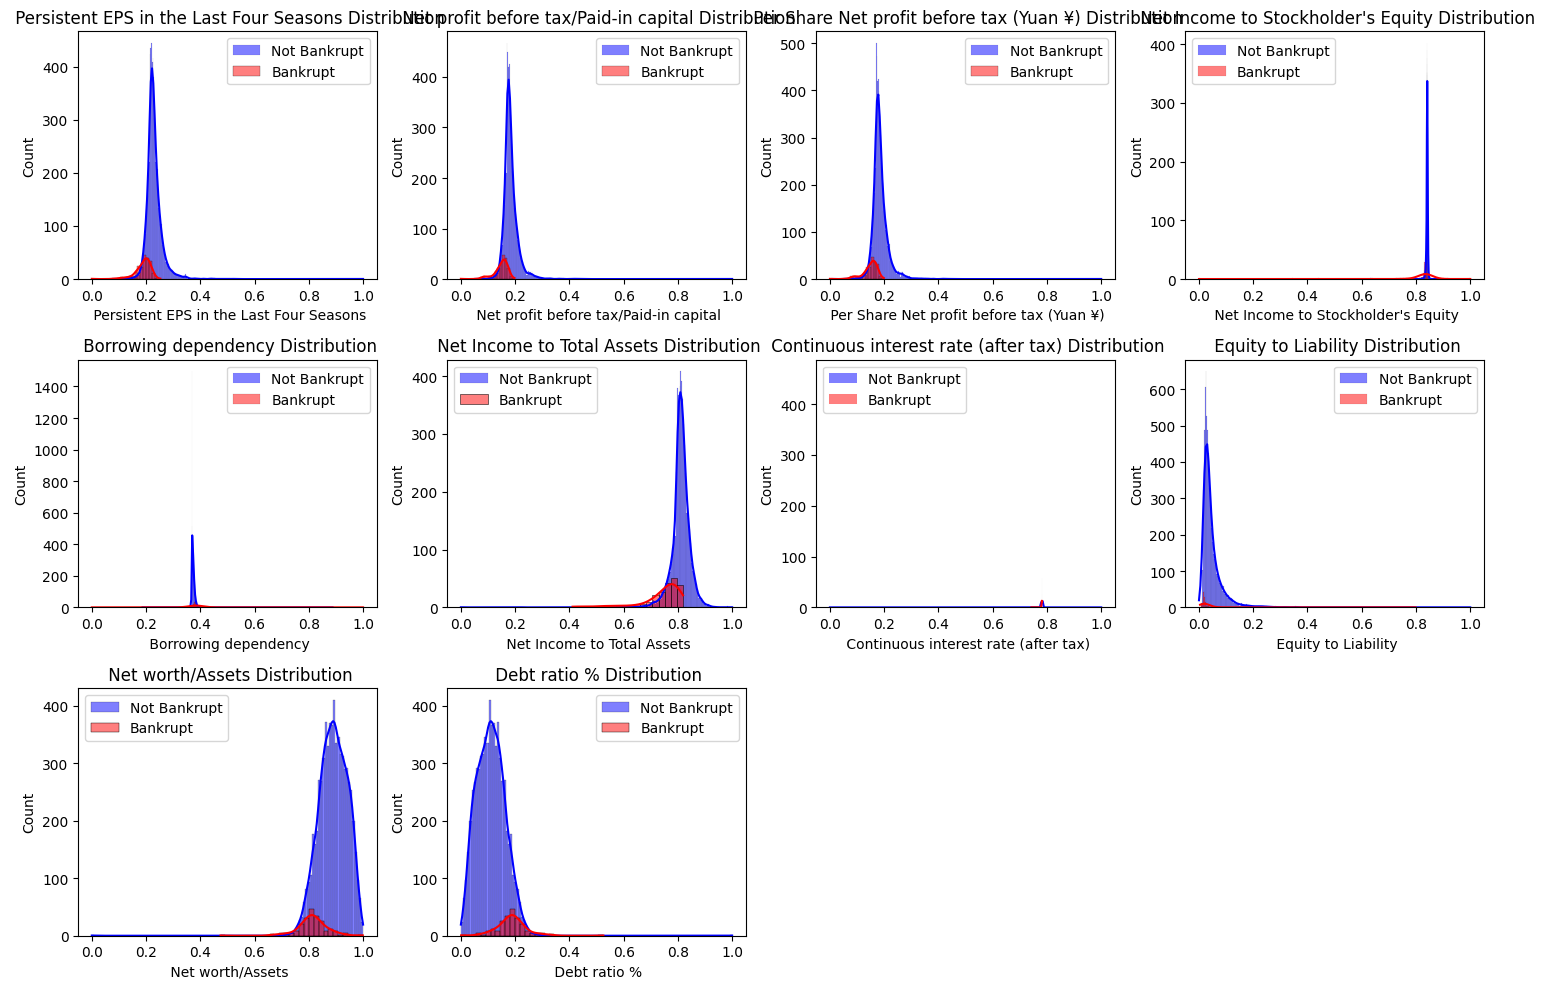

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(main[:-1]):  # Exclude the target variable
    plt.subplot(3, 4, i + 1)
    sns.histplot(subset_data[subset_data['Bankrupt'] == 0][feature], color='blue', label='Not Bankrupt', kde=True)
    sns.histplot(subset_data[subset_data['Bankrupt'] == 1][feature], color='red', label='Bankrupt', kde=True)
    plt.xlabel(feature)
    plt.legend()
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

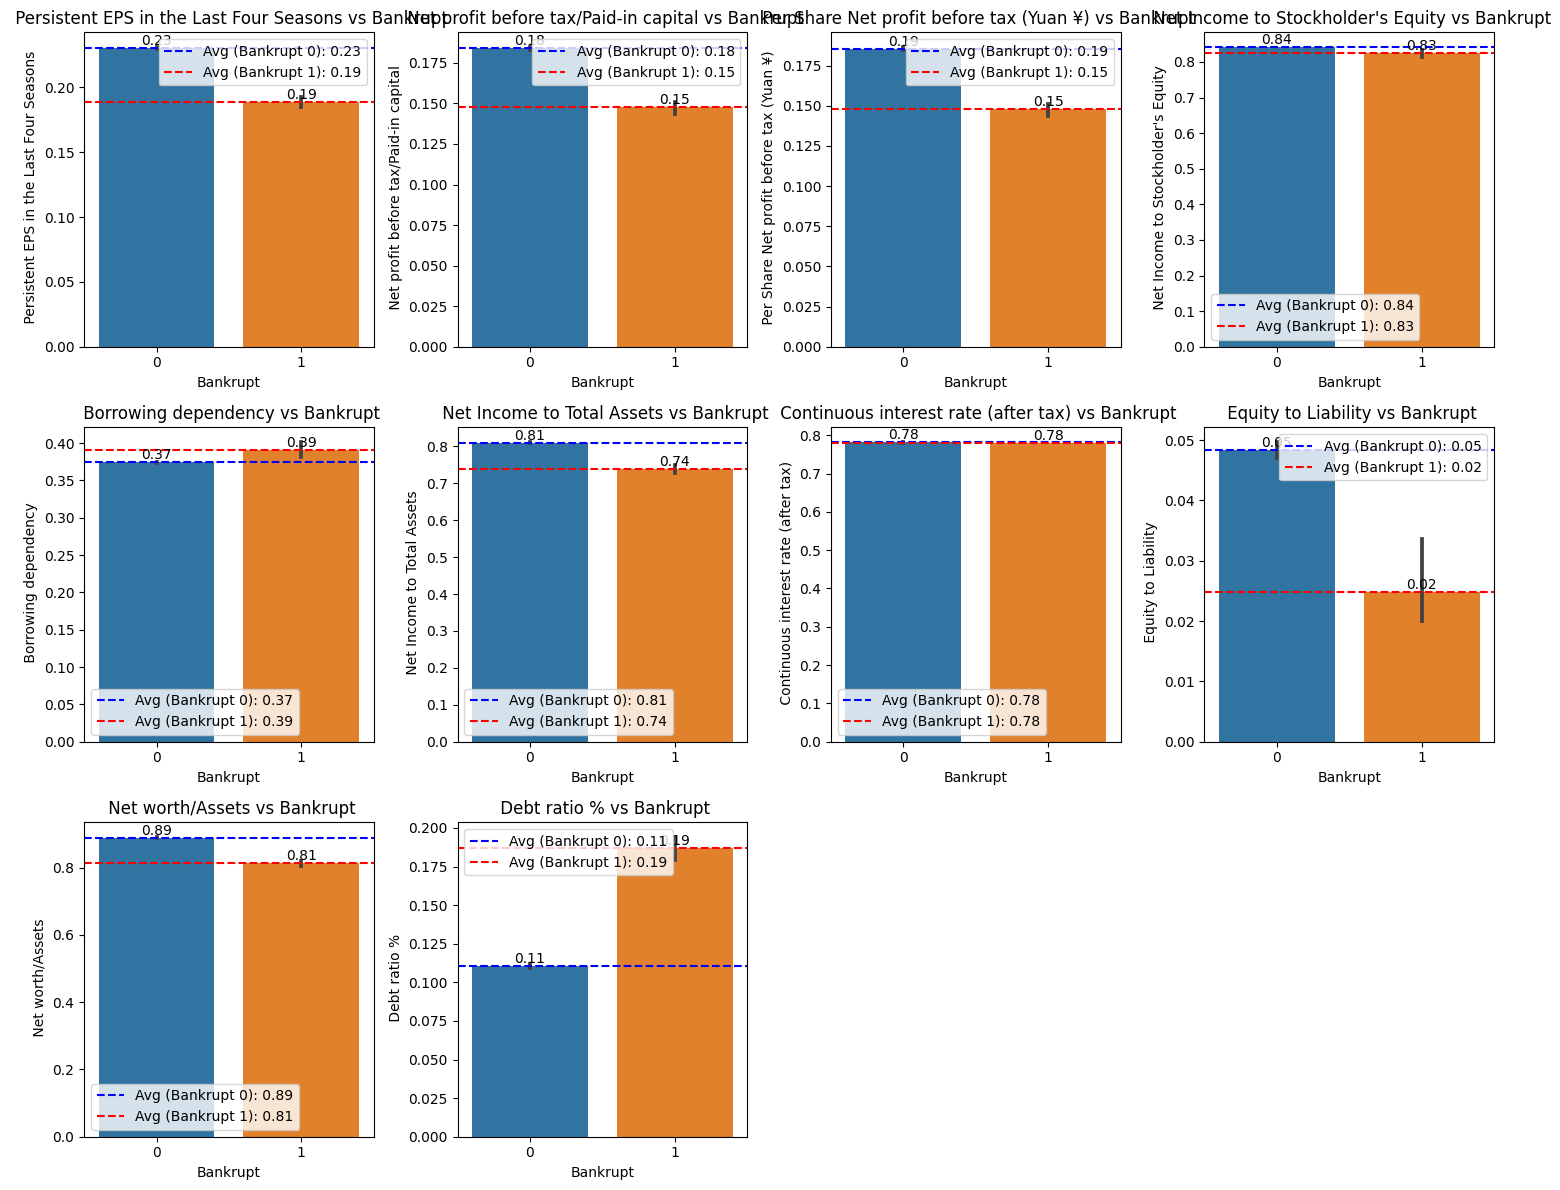

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

# Calculate average values for 'Bankrupt' categories
avg_values_bankrupt_0 = subset_data[subset_data['Bankrupt'] == 0].mean()
avg_values_bankrupt_1 = subset_data[subset_data['Bankrupt'] == 1].mean()

for i, feature in enumerate(main[:-1]):  # Exclude the target variable
    plt.subplot(3, 4, i + 1)
    ax = sns.barplot(x='Bankrupt', y=feature, data=subset_data)
    plt.xlabel('Bankrupt')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Bankrupt')

    # Add data values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    # Add average values as horizontal lines
    avg_0 = avg_values_bankrupt_0[feature]
    avg_1 = avg_values_bankrupt_1[feature]
    plt.axhline(avg_0, color='blue', linestyle='--', label=f'Avg (Bankrupt 0): {avg_0:.2f}')
    plt.axhline(avg_1, color='red', linestyle='--', label=f'Avg (Bankrupt 1): {avg_1:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-31-ca4291b7203e>:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


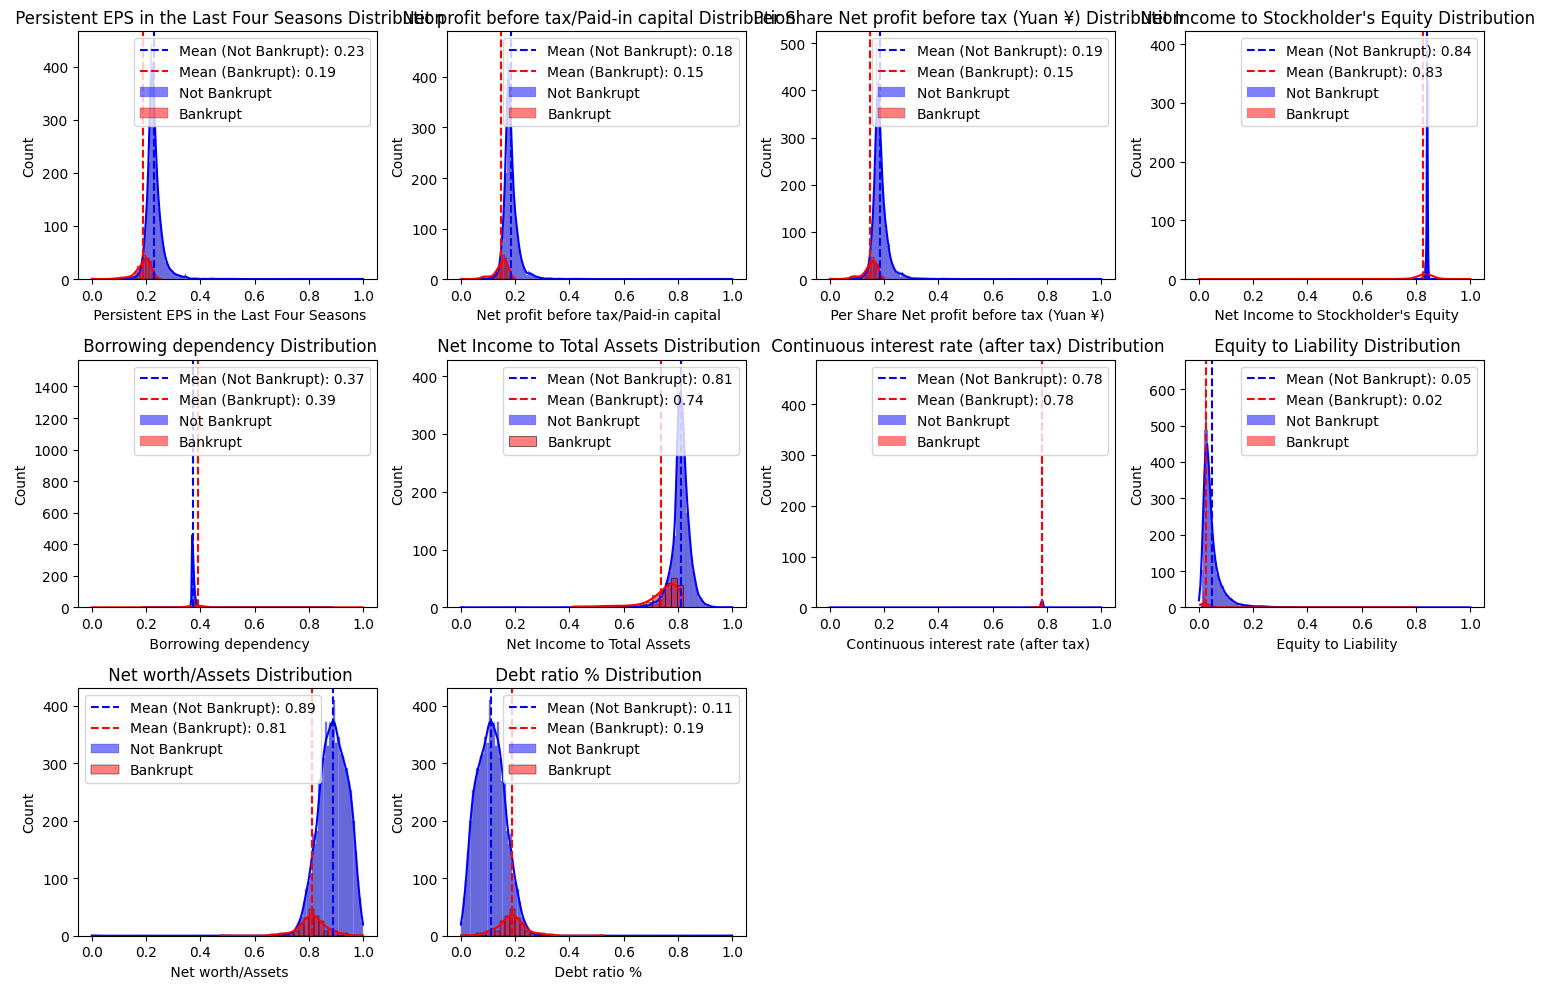

In [ ]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(main[:-1]):  # Exclude the target variable
    plt.subplot(3, 4, i + 1)

    # Plot histograms and KDEs for both 'Bankrupt' values
    sns.histplot(subset_data[subset_data['Bankrupt'] == 0][feature], color='blue', label='Not Bankrupt', kde=True)
    sns.histplot(subset_data[subset_data['Bankrupt'] == 1][feature], color='red', label='Bankrupt', kde=True)

    # Calculate upper distribution values (e.g., mean) for both 'Bankrupt' values
    mean_not_bankrupt = subset_data[subset_data['Bankrupt'] == 0][feature].mean()
    mean_bankrupt = subset_data[subset_data['Bankrupt'] == 1][feature].mean()

    # Add mean values to the plot
    plt.axvline(mean_not_bankrupt, color='blue', linestyle='--', label=f'Mean (Not Bankrupt): {mean_not_bankrupt:.2f}')
    plt.axvline(mean_bankrupt, color='red', linestyle='--', label=f'Mean (Bankrupt): {mean_bankrupt:.2f}')

    plt.xlabel(feature)
    plt.legend()
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

All distribution value is normal

#Scaling and Dimention Reduction

In [18]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=10)
sel_ = top_features.fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [19]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features_s = SelectKBest(mutual_info_classif, k=10)
sel_s = top_features_s.fit(X_trains, y_trains)

# display features
X_trains.columns[sel_s.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

## With Smoote (for AUC-Precision Recall and G-Mean)

In [21]:
# select features
top_features = SelectKBest(mutual_info_classif, k=10)
X_train = top_features.fit_transform(X_train, y_train)
X_test = top_features.transform(X_test)

In [22]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from imblearn.over_sampling import SMOTE

smote_pr = SMOTE(random_state=42)
X_train, y_train = smote_pr.fit_resample(X_train, y_train)

In [24]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

##Without Smoote (for AUC-ROC)

In [25]:
# select features
top_features_s = SelectKBest(mutual_info_classif, k=10)
X_trains = top_features_s.fit_transform(X_trains, y_trains)
X_tests = top_features_s.transform(X_tests)

In [26]:
scaler = RobustScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)

In [28]:
pca = PCA(n_components=5)
X_trains = pca.fit_transform(X_trains)
X_tests = pca.transform(X_tests)

# Model Training

In [29]:
!pip install catboost

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Logistic Regression

In [31]:
# Create and train the Logistic Regression model
LR_model_s = LogisticRegression(solver='lbfgs')
LR_model_s.fit(X_trains, y_trains)

LogisticRegression()

In [32]:
# Create and train the Logistic Regression model
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)

LogisticRegression()

## KNeighbors Classifier

In [33]:
KNN_model_s = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model_s.fit(X_trains, y_trains)

KNeighborsClassifier()

In [34]:
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

##Naive Bayes

In [35]:
NB_model_s = GaussianNB()
NB_model_s.fit(X_trains, y_trains)

GaussianNB()

In [36]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

##Decission Tree Classifier

In [37]:
DT_model_s = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model_s.fit(X_trains, y_trains)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##Random Forest Classifier

In [39]:
RF_model_s = RandomForestClassifier(n_estimators=10, criterion='entropy')
RF_model_s.fit(X_trains,y_trains)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
RF_model = RandomForestClassifier(n_estimators=10, criterion='entropy')
RF_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

##XGB Classifier

In [41]:
XGB_model_s = XGBClassifier()
XGB_model_s.fit(X_trains, y_trains)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##Cat Boost Classifier

In [43]:
CB_model_s = CatBoostClassifier()
CB_model_s.fit(X_trains, y_trains)

Learning rate set to 0.020081
0:	learn: 0.6485349	total: 49.6ms	remaining: 49.6s
1:	learn: 0.6070499	total: 52.5ms	remaining: 26.2s
2:	learn: 0.5681977	total: 55ms	remaining: 18.3s
3:	learn: 0.5320279	total: 58ms	remaining: 14.4s
4:	learn: 0.5017082	total: 61ms	remaining: 12.1s
5:	learn: 0.4679944	total: 64.2ms	remaining: 10.6s
6:	learn: 0.4400665	total: 67.7ms	remaining: 9.61s
7:	learn: 0.4136438	total: 70.3ms	remaining: 8.71s
8:	learn: 0.3897882	total: 73.3ms	remaining: 8.07s
9:	learn: 0.3678623	total: 76.5ms	remaining: 7.57s
10:	learn: 0.3490778	total: 79.5ms	remaining: 7.15s
11:	learn: 0.3299743	total: 82.7ms	remaining: 6.81s
12:	learn: 0.3132450	total: 86.7ms	remaining: 6.58s
13:	learn: 0.2968649	total: 95.3ms	remaining: 6.71s
14:	learn: 0.2821932	total: 102ms	remaining: 6.71s
15:	learn: 0.2667037	total: 107ms	remaining: 6.55s
16:	learn: 0.2543951	total: 110ms	remaining: 6.34s
17:	learn: 0.2422972	total: 113ms	remaining: 6.15s
18:	learn: 0.2326786	total: 122ms	remaining: 6.27s
19:

In [44]:
CB_model = CatBoostClassifier()
CB_model.fit(X_train, y_train)

Learning rate set to 0.026604
0:	learn: 0.6579311	total: 7.05ms	remaining: 7.04s
1:	learn: 0.6280654	total: 29.6ms	remaining: 14.8s
2:	learn: 0.6055920	total: 34.4ms	remaining: 11.4s
3:	learn: 0.5832898	total: 51.7ms	remaining: 12.9s
4:	learn: 0.5616313	total: 74.2ms	remaining: 14.8s
5:	learn: 0.5437873	total: 84.3ms	remaining: 14s
6:	learn: 0.5227689	total: 90.9ms	remaining: 12.9s
7:	learn: 0.5080896	total: 102ms	remaining: 12.6s
8:	learn: 0.4939448	total: 115ms	remaining: 12.6s
9:	learn: 0.4827047	total: 123ms	remaining: 12.2s
10:	learn: 0.4715708	total: 132ms	remaining: 11.9s
11:	learn: 0.4611437	total: 147ms	remaining: 12.1s
12:	learn: 0.4482691	total: 154ms	remaining: 11.7s
13:	learn: 0.4385957	total: 164ms	remaining: 11.6s
14:	learn: 0.4301891	total: 180ms	remaining: 11.8s
15:	learn: 0.4208633	total: 188ms	remaining: 11.6s
16:	learn: 0.4105438	total: 205ms	remaining: 11.8s
17:	learn: 0.4034978	total: 213ms	remaining: 11.6s
18:	learn: 0.3970056	total: 236ms	remaining: 12.2s
19:	le

##Light GBM Classifier

In [45]:
LGBM_model_s = LGBMClassifier()
LGBM_model_s.fit(X_trains, y_trains)

[LightGBM] [Info] Number of positive: 161, number of negative: 4612
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033731 -> initscore=-3.355013
[LightGBM] [Info] Start training from score -3.355013


LGBMClassifier()

In [46]:
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4612, number of negative: 4612
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 9224, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

##SVM

In [47]:
SVM_model_s = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model_s.fit(X_trains, y_trains)

SVC(kernel='linear', probability=True, random_state=0)

In [48]:
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

# Model Testing

## Logistic Regression

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

###AUC-ROC

In [50]:
# Predict probabilities
roc_lr_probs = LR_model_s.predict_proba(X_tests)[:, 1]

# Calculate ROC AUC Score for the model
roc_lr_auc = roc_auc_score(y_tests, roc_lr_probs)
print('Logistic: ROC AUC=%.3f' % (roc_lr_auc))

# Calculate ROC curve
roc_lr_fpr, roc_lr_tpr, _ = roc_curve(y_tests, roc_lr_probs)

Logistic: ROC AUC=0.925


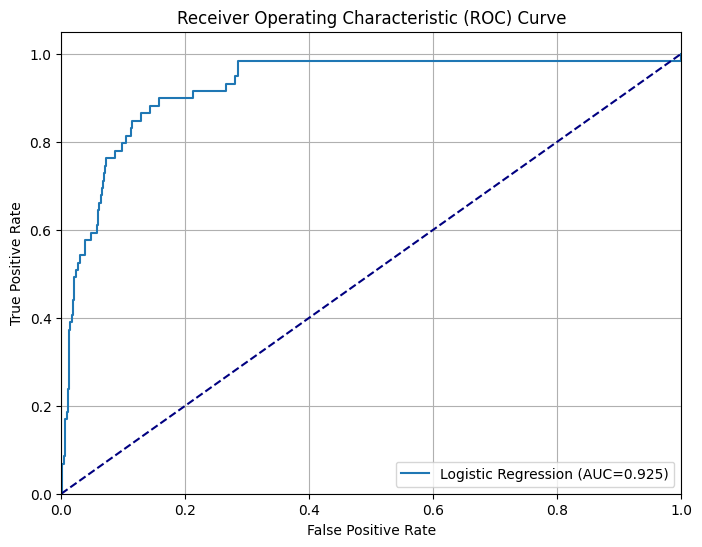

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(roc_lr_fpr, roc_lr_tpr, linestyle='-', label='Logistic Regression (AUC=%.3f)' % roc_lr_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [52]:
pr_lr_probs = LR_model.predict_proba(X_test)[:, 1]
# predict class values
pr_lr_model = LR_model.predict(X_test)
# calculate precision and recall for each threshold
pr_lr_precision, pr_lr_recall, _ = precision_recall_curve(y_test, pr_lr_probs)
# calculate scores
pr_lr_f1, pr_lr_auc = f1_score(y_test, pr_lr_model), auc(pr_lr_recall, pr_lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_lr_f1, pr_lr_auc))

Logistic: f1=0.283 auc=0.297


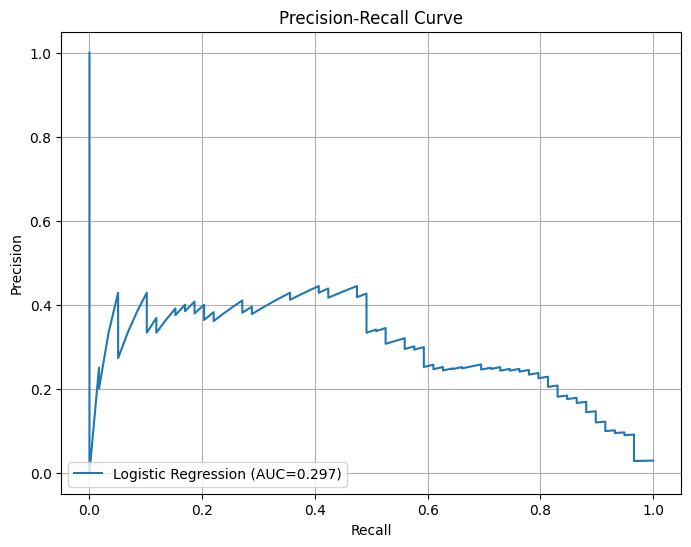

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(pr_lr_recall, pr_lr_precision, linestyle='-', label='Logistic Regression (AUC=%.3f)' % pr_lr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [54]:
# Predict probabilities and class values
gm_lr_model = LR_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_lr_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
lr_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", lr_g_mean)

True Positives: 52
False Negatives: 7
True Negatives: 1731
False Positives: 256
True Positive Rate (Recall): 0.8813559322033898
True Negative Rate (Specificity): 0.8711625566180171
G-Mean: 0.876244422058572


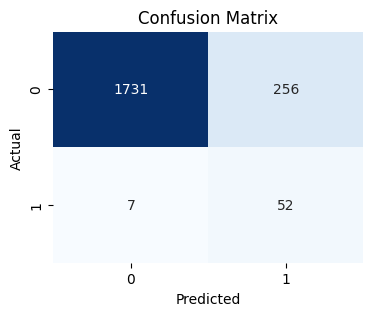

In [55]:
conf_matrix = confusion_matrix(y_test, gm_lr_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [56]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_lr = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_lr:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.169
Recall (True Positive Rate): 0.881
F1-Score: 0.283
Support: 59


##KNeighbors Classifier

###AUC-ROC

In [57]:
roc_knn_probs = KNN_model_s.predict_proba(X_tests)[:, 1]
roc_knn_auc = roc_auc_score(y_tests, roc_knn_probs)
print('KNN: ROC AUC=%.3f' % (roc_knn_auc))
roc_knn_fpr, roc_knn_tpr, _ = roc_curve(y_tests, roc_knn_probs)

KNN: ROC AUC=0.760


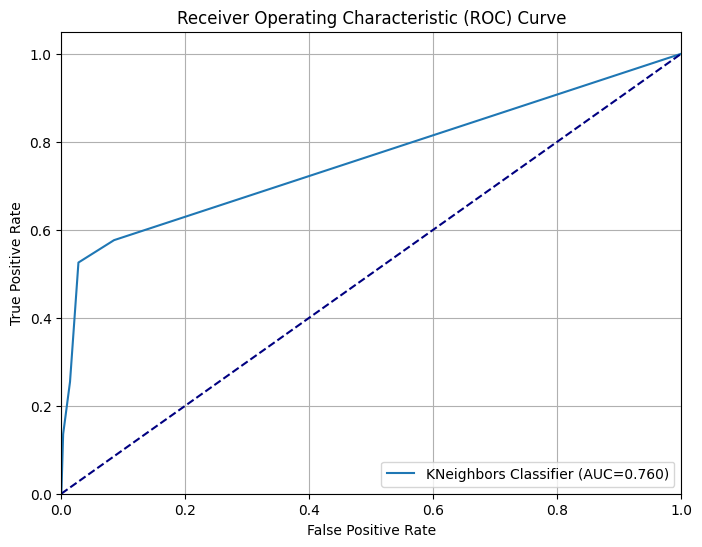

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(roc_knn_fpr, roc_knn_tpr, linestyle='-', label='KNeighbors Classifier (AUC=%.3f)' % roc_knn_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [60]:
pr_knn_probs = KNN_model.predict_proba(X_test)[:, 1]
# predict class values
pr_knn_model = KNN_model.predict(X_test)
# calculate precision and recall for each threshold
pr_knn_precision, pr_knn_recall, _ = precision_recall_curve(y_test, pr_knn_probs)
# calculate scores
pr_knn_f1, pr_knn_auc = f1_score(y_test, pr_knn_model), auc(pr_knn_recall, pr_knn_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_knn_f1, pr_knn_auc))

Logistic: f1=0.253 auc=0.376


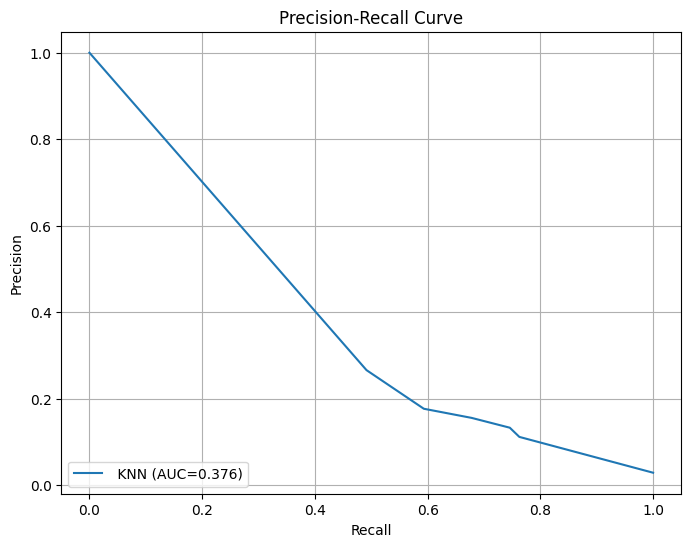

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(pr_knn_recall, pr_knn_precision, linestyle='-', label=' KNN (AUC=%.3f)' % pr_knn_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [62]:
# Predict probabilities and class values
gm_knn_model = KNN_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_knn_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
knn_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", knn_g_mean)

True Positives: 40
False Negatives: 19
True Negatives: 1770
False Positives: 217
True Positive Rate (Recall): 0.6779661016949152
True Negative Rate (Specificity): 0.8907901358832411
G-Mean: 0.7771264477889327


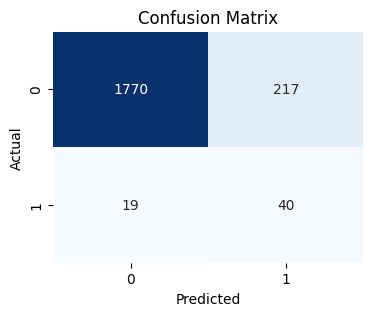

In [63]:
conf_matrix_knn = confusion_matrix(y_test, gm_knn_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [64]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_knn = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_knn:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.156
Recall (True Positive Rate): 0.678
F1-Score: 0.253
Support: 59


##Naive Bayes

###AUC-ROC

In [65]:
#from pandas.core.generic import DtypeArg
roc_nb_probs = NB_model_s.predict_proba(X_tests)[:, 1]
roc_nb_auc = roc_auc_score(y_tests, roc_nb_probs)
print('Naive Bayes: ROC AUC=%.3f' % (roc_nb_auc))
roc_nb_fpr, roc_nb_tpr, _ = roc_curve(y_tests, roc_nb_probs)

Naive Bayes: ROC AUC=0.891


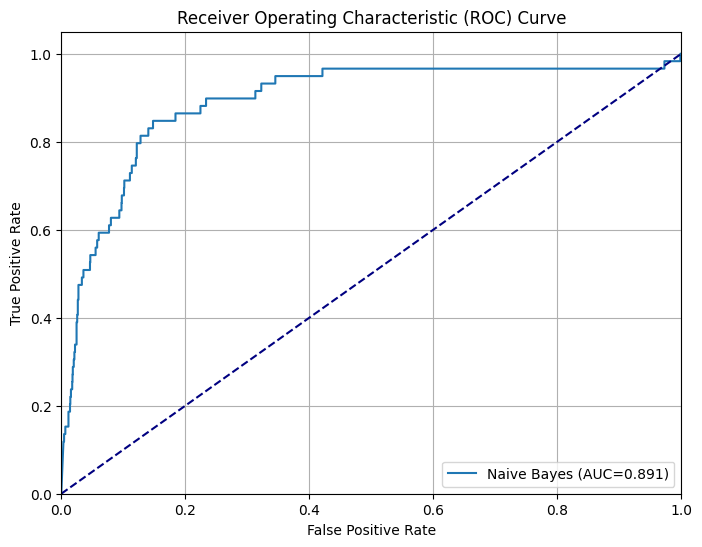

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(roc_nb_fpr, roc_nb_tpr, linestyle='-', label='Naive Bayes (AUC=%.3f)' % roc_nb_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [68]:
pr_nb_probs = NB_model.predict_proba(X_test)[:, 1]
# predict class values
pr_nb_model = NB_model.predict(X_test)
# calculate precision and recall for each threshold
pr_nb_precision, pr_nb_recall, _ = precision_recall_curve(y_test, pr_nb_probs)
# calculate scores
pr_nb_f1, pr_nb_auc = f1_score(y_test, pr_nb_model), auc(pr_nb_recall, pr_nb_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_nb_f1, pr_nb_auc))

Logistic: f1=0.298 auc=0.322


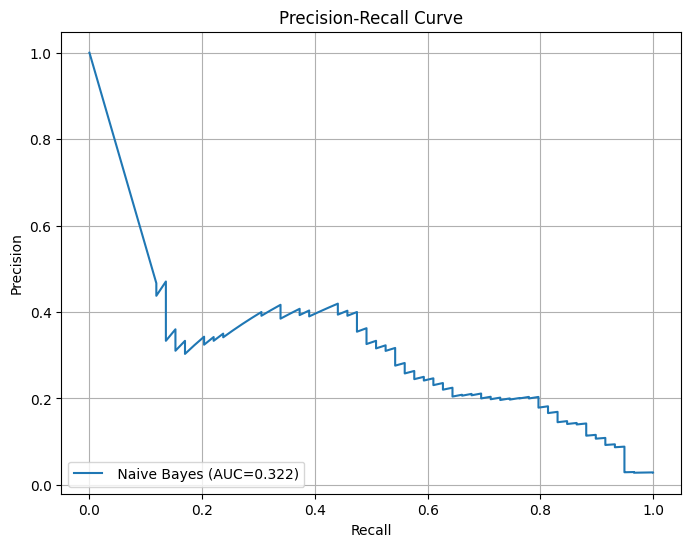

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(pr_nb_recall, pr_nb_precision, linestyle='-', label=' Naive Bayes (AUC=%.3f)' % pr_nb_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [70]:
# Predict probabilities and class values
gm_nb_model = NB_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_nb_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
nb_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", nb_g_mean)

True Positives: 47
False Negatives: 12
True Negatives: 1778
False Positives: 209
True Positive Rate (Recall): 0.7966101694915254
True Negative Rate (Specificity): 0.894816305988928
G-Mean: 0.8442865444726811


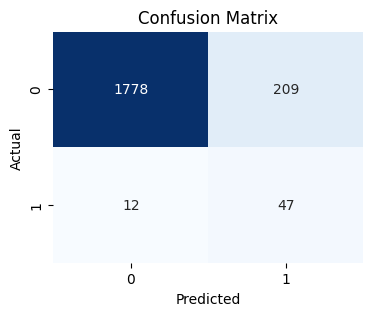

In [71]:
conf_matrix_knn = confusion_matrix(y_test, gm_nb_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [72]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_nb = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_nb:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.184
Recall (True Positive Rate): 0.797
F1-Score: 0.298
Support: 59


##Decission Tree Classifier

###AUC-ROC

In [73]:
roc_dt_probs = DT_model_s.predict_proba(X_tests)[:, 1]
roc_dt_auc = roc_auc_score(y_tests, roc_dt_probs)
print('Decision Tree: ROC AUC=%.3f' % (roc_dt_auc))
roc_dt_fpr, roc_dt_tpr, _ = roc_curve(y_tests, roc_dt_probs)

Decision Tree: ROC AUC=0.639


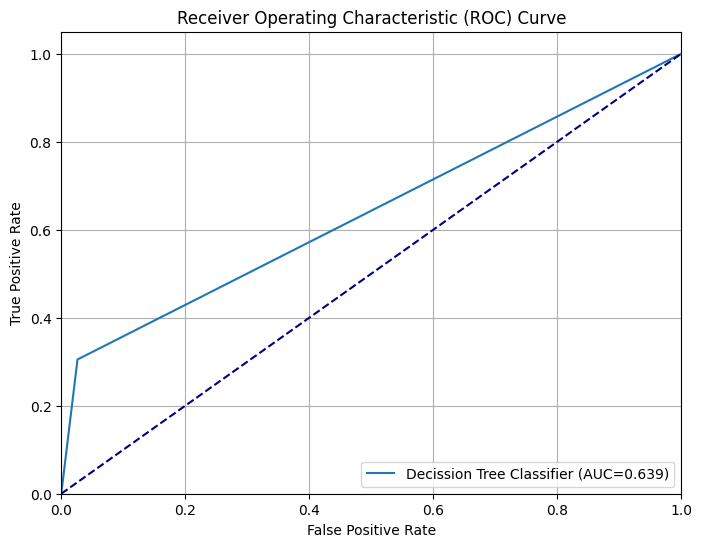

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(roc_dt_fpr, roc_dt_tpr, linestyle='-', label='Decission Tree Classifier (AUC=%.3f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [76]:
pr_dt_probs = DT_model.predict_proba(X_test)[:, 1]
# predict class values
pr_dt_model = DT_model.predict(X_test)
# calculate precision and recall for each threshold
pr_dt_precision, pr_dt_recall, _ = precision_recall_curve(y_test, pr_dt_probs)
# calculate scores
pr_dt_f1, pr_dt_auc = f1_score(y_test, pr_dt_model), auc(pr_dt_recall, pr_dt_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_dt_f1, pr_dt_auc))

Logistic: f1=0.254 auc=0.361


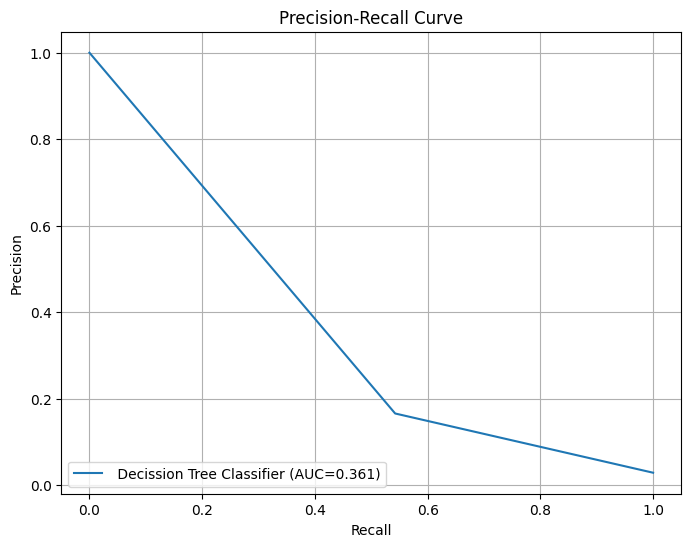

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(pr_dt_recall, pr_dt_precision, linestyle='-', label=' Decission Tree Classifier (AUC=%.3f)' % pr_dt_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [78]:
# Predict probabilities and class values
gm_dt_model = DT_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_dt_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
dt_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", dt_g_mean)

True Positives: 32
False Negatives: 27
True Negatives: 1826
False Positives: 161
True Positive Rate (Recall): 0.5423728813559322
True Negative Rate (Specificity): 0.9189733266230499
G-Mean: 0.7059930672816764


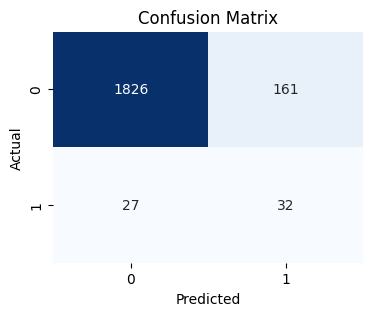

In [79]:
conf_matrix_dt = confusion_matrix(y_test, gm_dt_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [80]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_dt = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_dt:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.166
Recall (True Positive Rate): 0.542
F1-Score: 0.254
Support: 59


##Random Forest Classifier

###AUC-ROC

In [81]:
roc_rf_probs = RF_model_s.predict_proba(X_tests)[:, 1]
roc_rf_auc = roc_auc_score(y_tests, roc_rf_probs)
print('KNN: ROC AUC=%.3f' % (roc_rf_auc))
roc_rf_fpr, roc_rf_tpr, _ = roc_curve(y_tests, roc_rf_probs)

KNN: ROC AUC=0.845


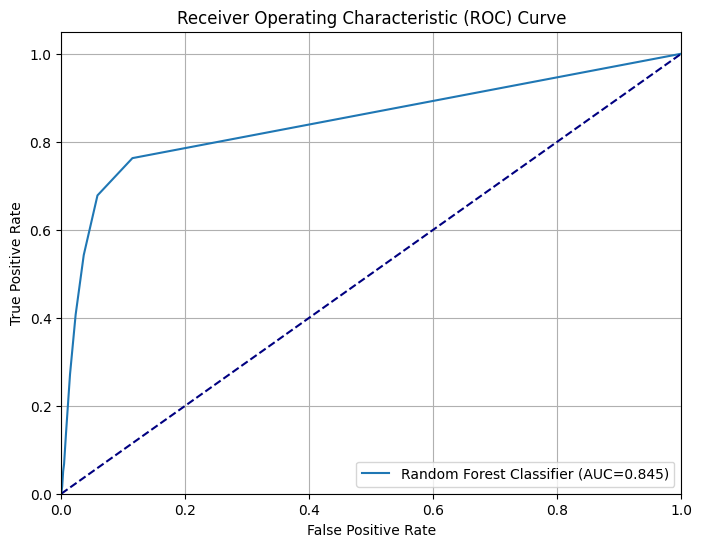

In [82]:
plt.figure(figsize=(8, 6))
plt.plot(roc_rf_fpr, roc_rf_tpr, linestyle='-', label='Random Forest Classifier (AUC=%.3f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [83]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [84]:
pr_rf_probs = RF_model.predict_proba(X_test)[:, 1]
# predict class values
pr_rf_model = RF_model.predict(X_test)
# calculate precision and recall for each threshold
pr_rf_precision, pr_rf_recall, _ = precision_recall_curve(y_test, pr_rf_probs)
# calculate scores
pr_rf_f1, pr_rf_auc = f1_score(y_test, pr_rf_model), auc(pr_rf_recall, pr_rf_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_rf_f1, pr_rf_auc))

Logistic: f1=0.283 auc=0.238


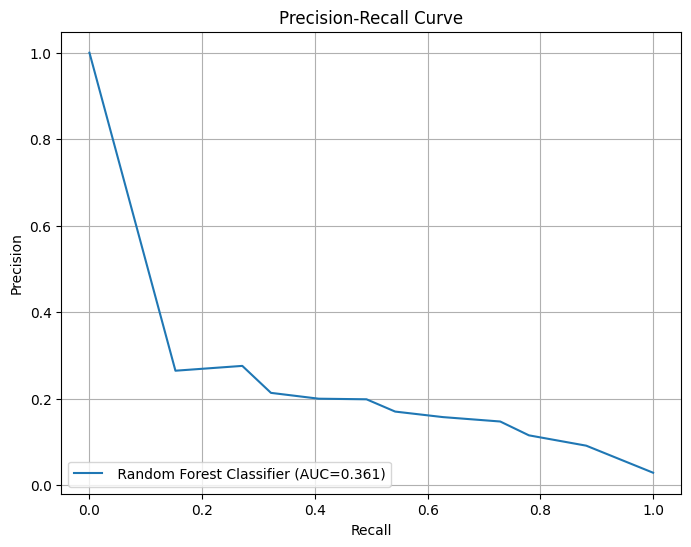

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(pr_rf_recall, pr_rf_precision, linestyle='-', label=' Random Forest Classifier (AUC=%.3f)' % pr_dt_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [86]:
# Predict probabilities and class values
gm_rf_model = XGB_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_rf_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
rf_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", rf_g_mean)

True Positives: 32
False Negatives: 27
True Negatives: 1840
False Positives: 147
True Positive Rate (Recall): 0.5423728813559322
True Negative Rate (Specificity): 0.926019124308002
G-Mean: 0.7086943351273722


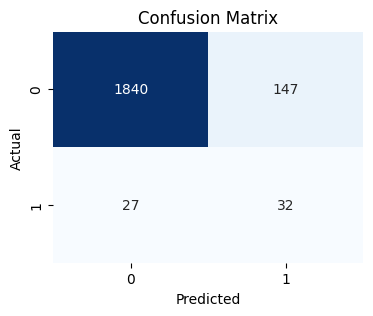

In [87]:
conf_matrix_rf = confusion_matrix(y_test, gm_rf_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [88]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_rf = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_rf:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.179
Recall (True Positive Rate): 0.542
F1-Score: 0.269
Support: 59


##XGBoost

###AUC-ROC

In [89]:
roc_xgb_probs = XGB_model_s.predict_proba(X_tests)[:, 1]
roc_xgb_auc = roc_auc_score(y_tests, roc_xgb_probs)
print('XGBoost: ROC AUC=%.3f' % (roc_xgb_auc))
roc_xgb_fpr, roc_xgb_tpr, _ = roc_curve(y_tests, roc_xgb_probs)

XGBoost: ROC AUC=0.922


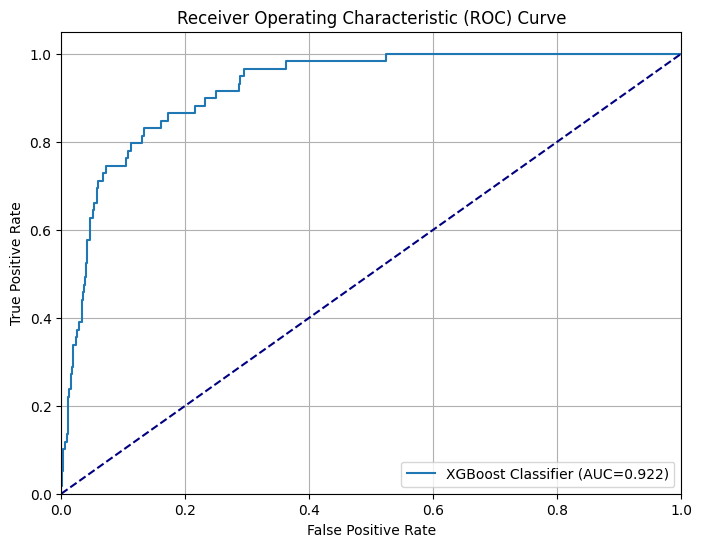

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(roc_xgb_fpr, roc_xgb_tpr, linestyle='-', label='XGBoost Classifier (AUC=%.3f)' % roc_xgb_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [91]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [92]:
pr_xgb_probs = XGB_model.predict_proba(X_test)[:, 1]
# predict class values
pr_xgb_model = XGB_model.predict(X_test)
# calculate precision and recall for each threshold
pr_xgb_precision, pr_xgb_recall, _ = precision_recall_curve(y_test, pr_xgb_probs)
# calculate scores
pr_xgb_f1, pr_xgb_auc = f1_score(y_test, pr_xgb_model), auc(pr_xgb_recall, pr_xgb_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_xgb_f1, pr_xgb_auc))

Logistic: f1=0.269 auc=0.223


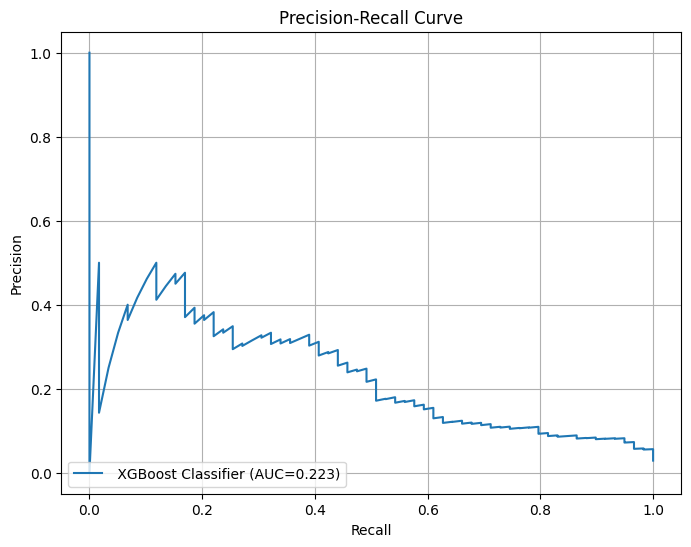

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(pr_xgb_recall, pr_xgb_precision, linestyle='-', label=' XGBoost Classifier (AUC=%.3f)' % pr_xgb_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [94]:
# Predict probabilities and class values
gm_xgb_model = XGB_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_xgb_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
xgb_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", xgb_g_mean)

True Positives: 32
False Negatives: 27
True Negatives: 1840
False Positives: 147
True Positive Rate (Recall): 0.5423728813559322
True Negative Rate (Specificity): 0.926019124308002
G-Mean: 0.7086943351273722


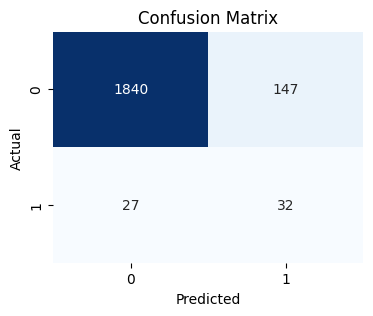

In [95]:
conf_matrix_xgb = confusion_matrix(y_test, gm_xgb_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [96]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_xgb = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_xgb:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.179
Recall (True Positive Rate): 0.542
F1-Score: 0.269
Support: 59


##Cat Boost Classifier

###AUC-ROC

In [97]:
roc_cb_probs = CB_model_s.predict_proba(X_tests)[:, 1]
roc_cb_auc = roc_auc_score(y_tests, roc_cb_probs)
print('Cat Boost: ROC AUC=%.3f' % (roc_cb_auc))
roc_cb_fpr, roc_cb_tpr, _ = roc_curve(y_tests, roc_cb_probs)

Cat Boost: ROC AUC=0.922


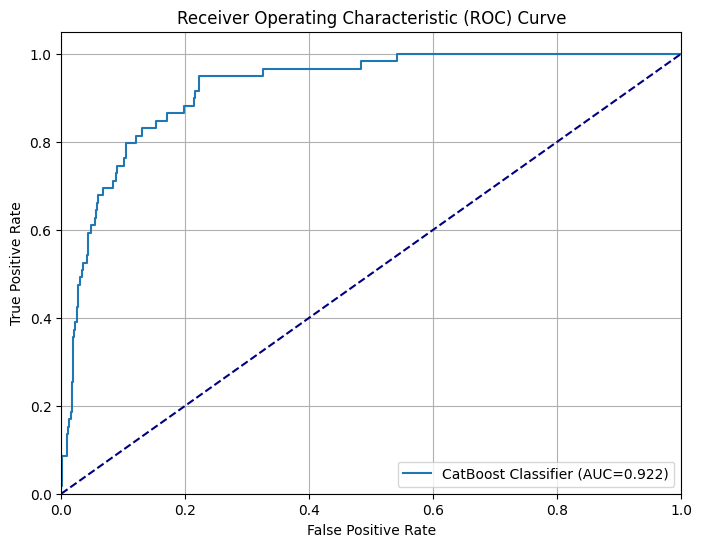

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(roc_cb_fpr, roc_cb_tpr, linestyle='-', label='CatBoost Classifier (AUC=%.3f)' % roc_cb_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [99]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [100]:
pr_cb_probs = CB_model.predict_proba(X_test)[:, 1]
# predict class values
pr_cb_model = CB_model.predict(X_test)
# calculate precision and recall for each threshold
pr_cb_precision, pr_cb_recall, _ = precision_recall_curve(y_test, pr_cb_probs)
# calculate scores
pr_cb_f1, pr_cb_auc = f1_score(y_test, pr_cb_model), auc(pr_cb_recall, pr_cb_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_cb_f1, pr_cb_auc))

Logistic: f1=0.276 auc=0.270


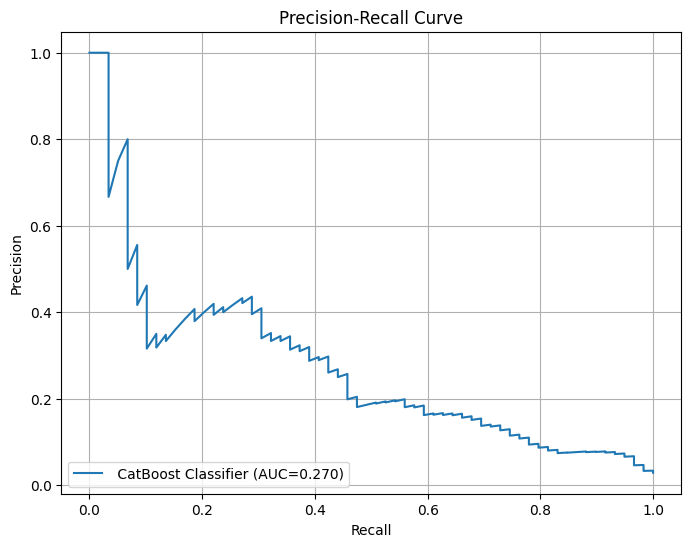

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(pr_cb_recall, pr_cb_precision, linestyle='-', label=' CatBoost Classifier (AUC=%.3f)' % pr_cb_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [102]:
# Predict probabilities and class values
gm_cb_model = CB_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_cb_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
cb_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", cb_g_mean)

True Positives: 34
False Negatives: 25
True Negatives: 1834
False Positives: 153
True Positive Rate (Recall): 0.576271186440678
True Negative Rate (Specificity): 0.9229994967287368
G-Mean: 0.7293133860447221


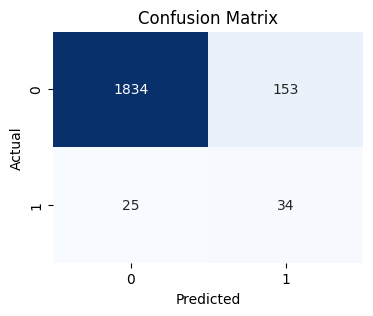

In [103]:
conf_matrix_cb = confusion_matrix(y_test, gm_cb_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_cb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [104]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_cb = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_cb:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.182
Recall (True Positive Rate): 0.576
F1-Score: 0.276
Support: 59


## LightGBM Classifier

###AUC-ROC

In [105]:
roc_lgbm_probs = LGBM_model_s.predict_proba(X_tests)[:, 1]
roc_lgbm_auc = roc_auc_score(y_tests, roc_lgbm_probs)
print('Light GBM: ROC AUC=%.3f' % (roc_lgbm_auc))
roc_lgbm_fpr, roc_lgbm_tpr, _ = roc_curve(y_tests, roc_lgbm_probs)

Light GBM: ROC AUC=0.928


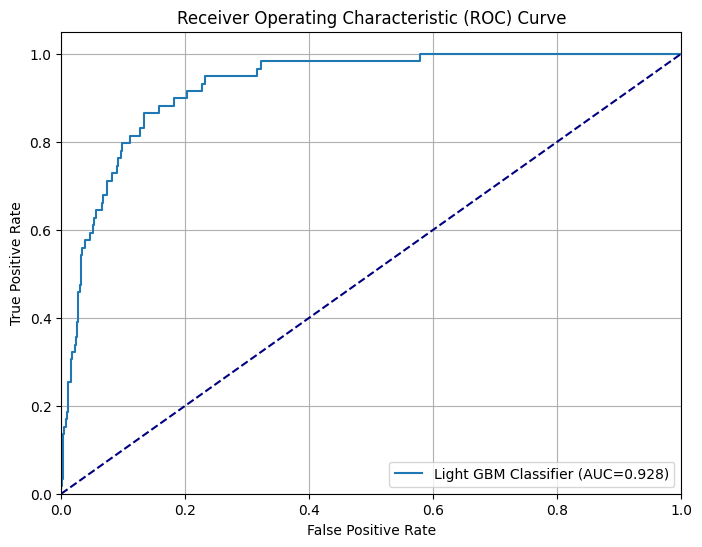

In [106]:
plt.figure(figsize=(8, 6))
plt.plot(roc_lgbm_fpr, roc_lgbm_tpr, linestyle='-', label='Light GBM Classifier (AUC=%.3f)' % roc_lgbm_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [107]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [108]:
pr_lgbm_probs = LGBM_model.predict_proba(X_test)[:, 1]
# predict class values
pr_lgbm_model = LGBM_model.predict(X_test)
# calculate precision and recall for each threshold
pr_lgbm_precision, pr_lgbm_recall, _ = precision_recall_curve(y_test, pr_lgbm_probs)
# calculate scores
pr_lgbm_f1, pr_lgbm_auc = f1_score(y_test, pr_lgbm_model), auc(pr_lgbm_recall, pr_lgbm_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_lgbm_f1, pr_lgbm_auc))

Logistic: f1=0.243 auc=0.243


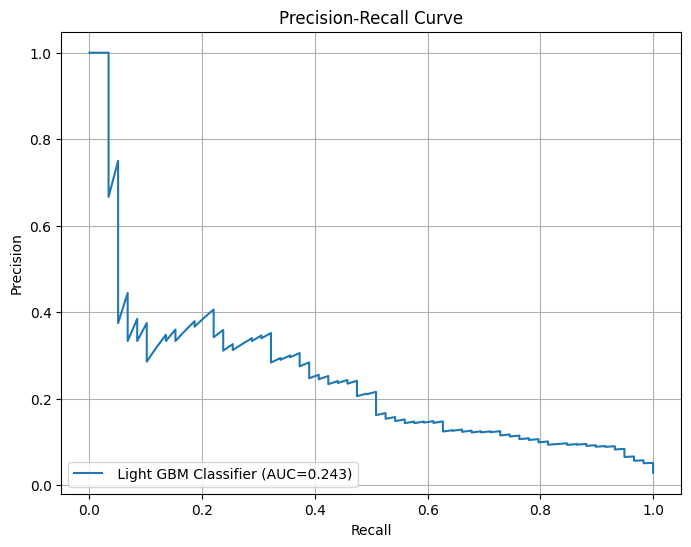

In [109]:
plt.figure(figsize=(8, 6))
plt.plot(pr_lgbm_recall, pr_lgbm_precision, linestyle='-', label=' Light GBM Classifier (AUC=%.3f)' % pr_lgbm_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [110]:
# Predict probabilities and class values
gm_lgbm_model = LGBM_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_lgbm_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
lgbm_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", lgbm_g_mean)

True Positives: 31
False Negatives: 28
True Negatives: 1822
False Positives: 165
True Positive Rate (Recall): 0.5254237288135594
True Negative Rate (Specificity): 0.9169602415702064
G-Mean: 0.6941128649575659


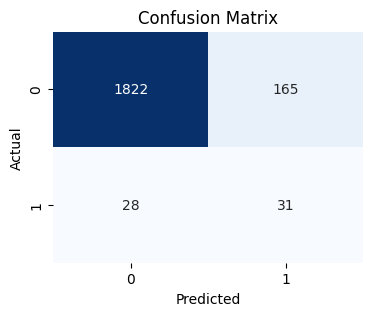

In [111]:
conf_matrix_lgbm = confusion_matrix(y_test, gm_lgbm_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [112]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_lgbm = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_lgbm:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.158
Recall (True Positive Rate): 0.525
F1-Score: 0.243
Support: 59


##SVM

###AUC-ROC

In [113]:
roc_svc_probs = SVM_model_s.predict_proba(X_tests)[:, 1]
roc_svc_auc = roc_auc_score(y_tests, roc_svc_probs)
print('SVM: ROC AUC=%.3f' % (roc_svc_auc))
roc_svc_fpr, roc_svc_tpr, _ = roc_curve(y_tests, roc_svc_probs)

SVM: ROC AUC=0.913


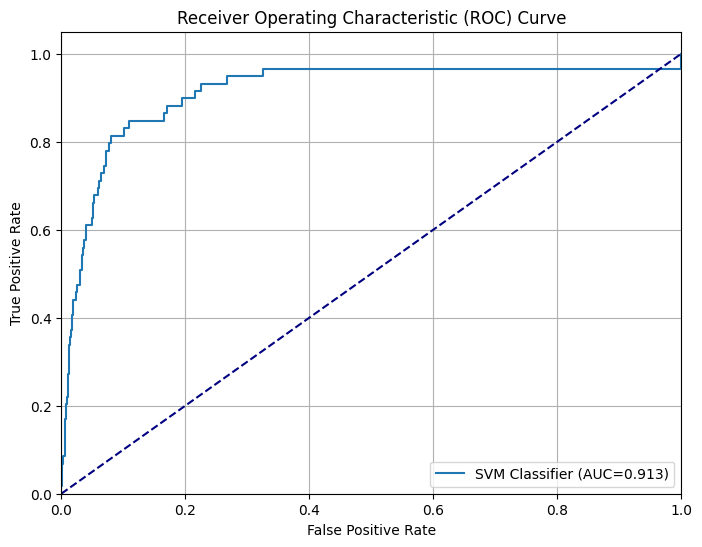

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(roc_svc_fpr, roc_svc_tpr, linestyle='-', label='SVM Classifier (AUC=%.3f)' % roc_svc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###AUC-Precision-Recall

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [116]:
pr_svc_probs = SVM_model.predict_proba(X_test)[:, 1]
# predict class values
pr_svc_model = SVM_model.predict(X_test)
# calculate precision and recall for each threshold
pr_svc_precision, pr_svc_recall, _ = precision_recall_curve(y_test, pr_svc_probs)
# calculate scores
pr_svc_f1, pr_svc_auc = f1_score(y_test, pr_svc_model), auc(pr_svc_recall, pr_svc_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (pr_svc_f1, pr_svc_auc))

Logistic: f1=0.263 auc=0.299


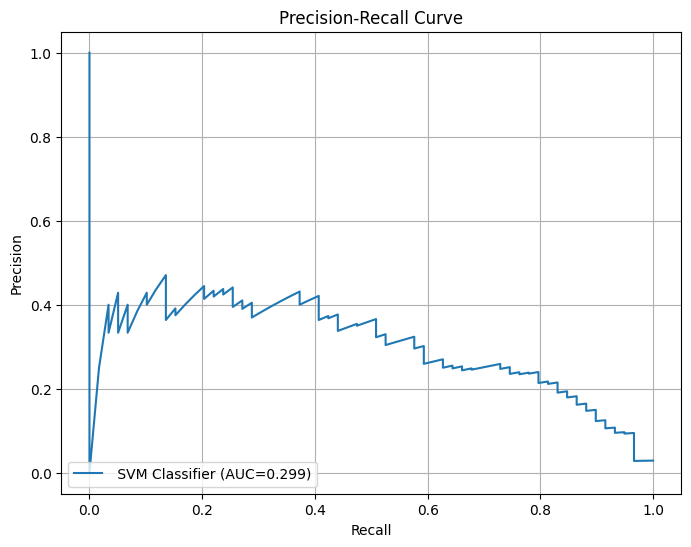

In [117]:
plt.figure(figsize=(8, 6))
plt.plot(pr_svc_recall, pr_svc_precision, linestyle='-', label=' SVM Classifier (AUC=%.3f)' % pr_svc_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

###G-Mean

In [118]:
# Predict probabilities and class values
gm_svc_model = SVM_model.predict(X_test)

# Calculate True Positives, False Negatives, True Negatives, and False Positives
tn, fp, fn, tp = confusion_matrix(y_test, gm_svc_model).ravel()

# Calculate True Positive Rate (Recall) and True Negative Rate (Specificity)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Calculate G-Mean
svc_g_mean = (tpr * tnr) ** 0.5

print("True Positives:", tp)
print("False Negatives:", fn)
print("True Negatives:", tn)
print("False Positives:", fp)
print("True Positive Rate (Recall):", tpr)
print("True Negative Rate (Specificity):", tnr)
print("G-Mean:", svc_g_mean)

True Positives: 52
False Negatives: 7
True Negatives: 1703
False Positives: 284
True Positive Rate (Recall): 0.8813559322033898
True Negative Rate (Specificity): 0.8570709612481128
G-Mean: 0.8691286303046781


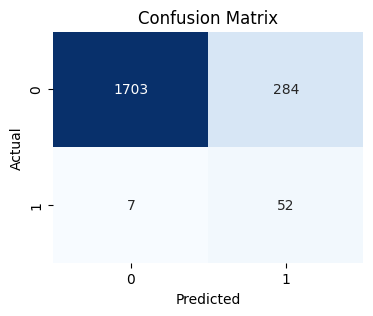

In [119]:
conf_matrix_svc = confusion_matrix(y_test, gm_svc_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Classification Report

In [120]:
# Calculate precision, recall, F1-score, and support
precision = tp / (tp + fp)
recall = tpr
f1_score_svc = 2 * (precision * recall) / (precision + recall)
support = tp + fn

# Print the classification report
print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall (True Positive Rate): {recall:.3f}")
print(f"F1-Score: {f1_score_svc:.3f}")
print(f"Support: {support}")

Classification Report:
Precision: 0.155
Recall (True Positive Rate): 0.881
F1-Score: 0.263
Support: 59


##Baseline Model

In [121]:
# Calculate ROC curve for "No Skill"
ns_probs = [0 for _ in range(len(y_tests))]
ns_auc = roc_auc_score(y_tests, ns_probs)
print('Baseline_model=%.3f' % (ns_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_tests, ns_probs)

Baseline_model=0.500


#Plot

##AUC-ROC Curve

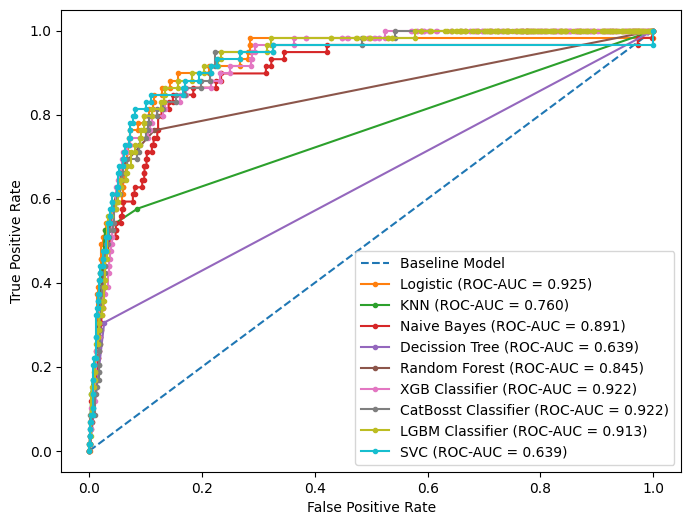

In [122]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline Model')
plt.plot(roc_lr_fpr, roc_lr_tpr, marker='.', label='Logistic (ROC-AUC = %0.3f)'% roc_lr_auc)
plt.plot(roc_knn_fpr, roc_knn_tpr, marker='.', label='KNN (ROC-AUC = %0.3f)'% roc_knn_auc)
plt.plot(roc_nb_fpr, roc_nb_tpr, marker='.', label='Naive Bayes (ROC-AUC = %0.3f)'% roc_nb_auc)
plt.plot(roc_dt_fpr, roc_dt_tpr, marker='.', label='Decission Tree (ROC-AUC = %0.3f)'% roc_dt_auc)
plt.plot(roc_rf_fpr, roc_rf_tpr, marker='.', label='Random Forest (ROC-AUC = %0.3f)'% roc_rf_auc)
plt.plot(roc_xgb_fpr, roc_xgb_tpr, marker='.', label='XGB Classifier (ROC-AUC = %0.3f)'% roc_xgb_auc)
plt.plot(roc_cb_fpr, roc_cb_tpr, marker='.', label='CatBosst Classifier (ROC-AUC = %0.3f)'% roc_cb_auc)
plt.plot(roc_lgbm_fpr, roc_lgbm_tpr, marker='.', label='LGBM Classifier (ROC-AUC = %0.3f)'% roc_svc_auc)
plt.plot(roc_svc_fpr, roc_svc_tpr, marker='.', label='SVC (ROC-AUC = %0.3f)'% roc_dt_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##AUC-Precission Recall

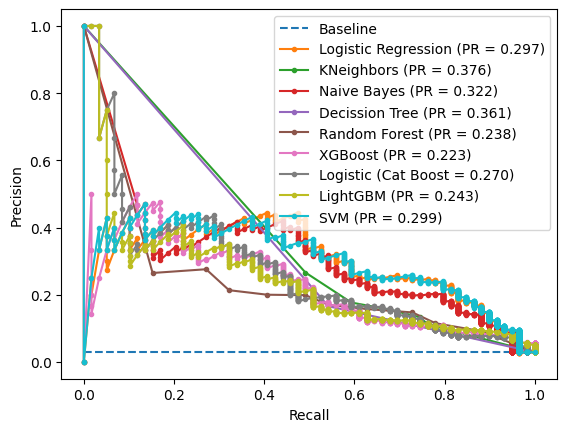

In [123]:
baseline = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
pyplot.plot(pr_lr_recall, pr_lr_precision, marker='.', label='Logistic Regression (PR = %0.3f)'% pr_lr_auc)
pyplot.plot(pr_knn_recall, pr_knn_precision, marker='.', label='KNeighbors (PR = %0.3f)'% pr_knn_auc)
pyplot.plot(pr_nb_recall, pr_nb_precision, marker='.', label='Naive Bayes (PR = %0.3f)'% pr_nb_auc)
pyplot.plot(pr_dt_recall, pr_dt_precision, marker='.', label='Decission Tree (PR = %0.3f)'% pr_dt_auc)
pyplot.plot(pr_rf_recall, pr_rf_precision, marker='.', label='Random Forest (PR = %0.3f)'% pr_rf_auc)
pyplot.plot(pr_xgb_recall, pr_xgb_precision, marker='.', label='XGBoost (PR = %0.3f)'% pr_xgb_auc)
pyplot.plot(pr_cb_recall, pr_cb_precision, marker='.', label='Logistic (Cat Boost = %0.3f)'% pr_cb_auc)
pyplot.plot(pr_lgbm_recall, pr_lgbm_precision, marker='.', label='LightGBM (PR = %0.3f)'% pr_lgbm_auc)
pyplot.plot(pr_svc_recall, pr_svc_precision, marker='.', label='SVM (PR = %0.3f)'% pr_svc_auc)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

##G-Means Char

<ipython-input-124-70c3592b2996>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.01, label='G-Mean Value')


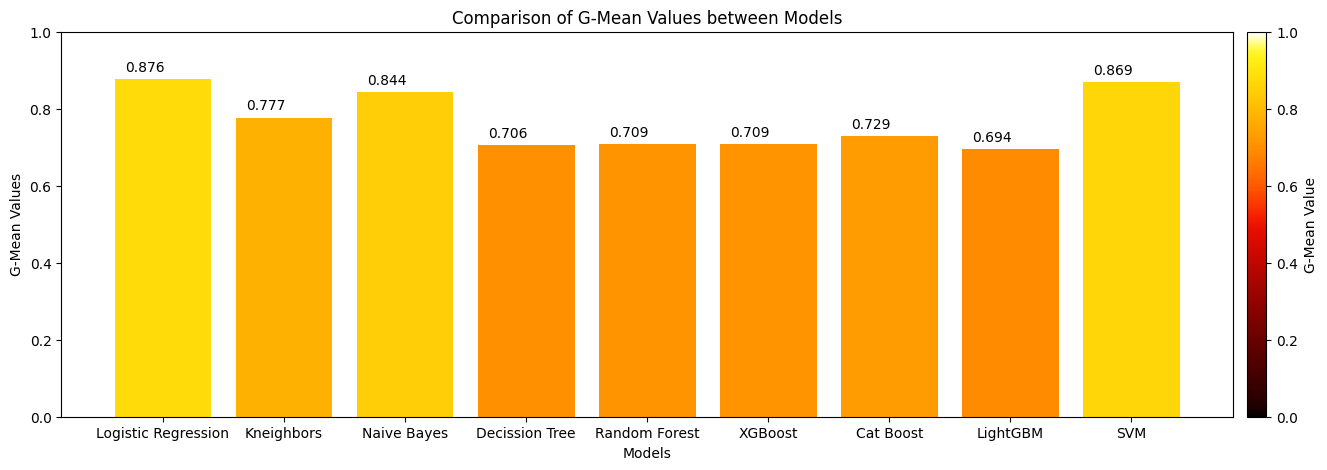

In [124]:
import matplotlib.pyplot as plt
import colorcet as cc

# G-Mean values from different models
g_means = [lr_g_mean, knn_g_mean, nb_g_mean, dt_g_mean, rf_g_mean, xgb_g_mean, cb_g_mean, lgbm_g_mean, svc_g_mean]
models = ["Logistic Regression", "Kneighbors", "Naive Bayes", "Decission Tree", "Random Forest", "XGBoost", "Cat Boost", "LightGBM", "SVM"]

aurora_colormap = cc.cm['fire']

# Create bar chart with aurora gradient colormap
plt.figure(figsize=(18, 5))
bars = plt.bar(models, g_means, color=aurora_colormap(g_means))
plt.xlabel('Models')
plt.ylabel('G-Mean Values')
plt.title('Comparison of G-Mean Values between Models')
plt.ylim(0, 1)  # Set the y-axis limit to the G-Mean range (0 to 1)

# Adding labels to each bar
for bar, label in zip(bars, g_means):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{label:.3f}', ha='center', color='black', fontsize=10)

# Show the colorbar for reference
sm = plt.cm.ScalarMappable(cmap=aurora_colormap)
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.01, label='G-Mean Value')

plt.show()

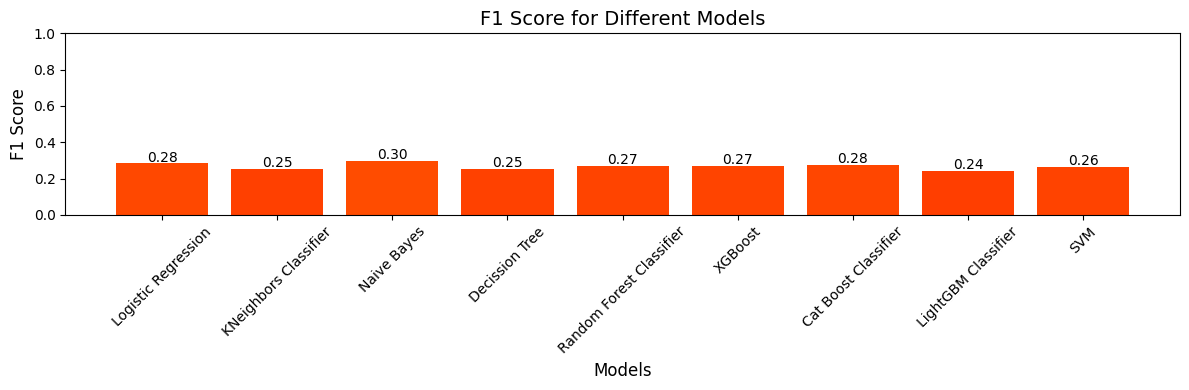

In [125]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

f1_scores = [f1_score_lr, f1_score_knn, f1_score_nb, f1_score_dt, f1_score_rf, f1_score_xgb, f1_score_cb, f1_score_lgbm, f1_score_svc]

categories = ['Logistic Regression', 'KNeighbors Classifier', 'Naive Bayes', 'Decission Tree', 'Random Forest Classifier', 'XGBoost', 'Cat Boost Classifier', 'LightGBM Classifier', 'SVM']
cmap = LinearSegmentedColormap.from_list("mycmap", [(0, 'red'), (1, 'yellow')])

plt.figure(figsize=(12, 4))
bars = plt.bar(categories, f1_scores, color=[cmap(score) for score in f1_scores])
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score for Different Models', fontsize=14)
plt.ylim(0, 1)

for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f'{f1:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`"Persistent EPS in the Last Four Seasons"`<br>
Adalah istilah yang digunakan dalam analisis keuangan untuk mengukur kinerja perusahaan dalam hal pendapatan per saham (Earnings Per Share atau EPS) selama empat musim atau empat kuartal terakhir. EPS adalah salah satu metrik yang digunakan untuk mengukur profitabilitas perusahaan dan mencerminkan pendapatan per lembar saham yang tersedia untuk pemegang saham.

Untuk menghitung Persistent EPS in the Last Four Seasons, langkah-langkah berikut dapat diikuti:

Hitung EPS untuk Setiap Musim atau Kuartal: Pertama, Anda harus menghitung EPS untuk masing-masing dari empat musim terakhir. EPS dihitung dengan membagi laba bersih perusahaan (net income) selama periode itu dengan jumlah saham beredar.

Contoh: Jika laba bersih perusahaan selama musim pertama adalah $1.000.000 dan jumlah saham beredar adalah 500.000 lembar, maka EPS untuk musim pertama adalah $1.000.000 / 500.000 = $2 per saham.

Jumlahkan EPS Keempat Musim Terakhir: Selanjutnya, jumlahkan EPS yang telah dihitung untuk setiap musim atau kuartal dalam empat musim terakhir. Ini akan memberikan total EPS per saham untuk periode tersebut.

Contoh: Jika EPS untuk empat musim terakhir adalah $2, $2.20, $2.30, dan $2.50, maka jumlahnya adalah $2 + $2.20 + $2.30 + $2.50 = $9 per saham.

Hitung Rata-Rata EPS: Selanjutnya, hitung rata-rata dari EPS empat musim terakhir dengan membagi jumlah EPS oleh 4 (jumlah musim atau kuartal).

Contoh: Dengan jumlah EPS sebelumnya adalah $9, maka rata-rata EPS adalah $9 / 4 = $2.25 per saham.

Tentukan Tingkat Pertumbuhan Persistent EPS: Dengan rata-rata EPS yang telah dihitung, Anda dapat menggunakan informasi ini untuk mengidentifikasi tren pertumbuhan persistent EPS selama empat musim terakhir. Pertumbuhan yang positif menunjukkan kinerja yang baik dan stabil selama periode tersebut, sementara pertumbuhan yang negatif dapat menunjukkan masalah potensial dalam profitabilitas perusahaan.

Mengukur Persistent EPS in the Last Four Seasons adalah cara untuk mengevaluasi sejauh mana perusahaan telah mempertahankan dan meningkatkan profitabilitasnya selama periode waktu yang signifikan. Ini dapat menjadi indikator penting dalam analisis keuangan dan pengambilan keputusan investasi karena memberikan gambaran tentang kinerja jangka pendek dan stabilitas pendapatan perusahaan.

`"Net Profit Before Tax/Paid-in Capital"`<br> adalah rasio keuangan yang digunakan untuk mengukur profitabilitas dan efisiensi penggunaan modal yang telah diinvestasikan dalam sebuah perusahaan. Rasio ini memberikan pandangan tentang sejauh mana perusahaan menghasilkan laba bersih sebelum pembayaran pajak (Net Profit Before Tax) dibandingkan dengan jumlah modal yang telah disetor oleh pemegang saham (Paid-in Capital). Ini dapat membantu para pemangku kepentingan, seperti investor dan manajemen, dalam mengevaluasi sejauh mana perusahaan dapat menghasilkan laba dari modal yang telah diinvestasikan.*italicized text*

Di sini, "Net Profit Before Tax" mengacu pada laba bersih sebelum pembayaran pajak yang dikenakan pada perusahaan, sementara "Paid-in Capital" adalah jumlah modal yang telah diinvestasikan oleh pemegang saham dalam perusahaan.

Interpretasi dari rasio ini adalah sebagai berikut:

Jika rasio ini tinggi, itu menunjukkan bahwa perusahaan mampu menghasilkan laba yang tinggi sehubungan dengan modal yang telah diinvestasikan. Ini bisa dianggap sebagai tanda baik karena menunjukkan efisiensi dalam penggunaan modal.

Sebaliknya, jika rasio ini rendah, itu menunjukkan bahwa perusahaan mungkin tidak efisien dalam menghasilkan laba sehubungan dengan modal yang tersedia. Ini bisa menandakan bahwa perusahaan mungkin menghadapi masalah profitabilitas atau penggunaan modal yang kurang efisien.

Rasio ini sebaiknya tidak digunakan sebagai satu-satunya ukuran kinerja perusahaan karena hanya memberikan pandangan tertentu tentang hubungan antara laba dan modal. Evaluasi lebih lanjut diperlukan untuk memahami faktor-faktor yang memengaruhi profitabilitas dan penggunaan modal dalam konteks perusahaan secara keseluruhan. Selain itu, rasio ini juga perlu dibandingkan dengan rasio-rasio keuangan lainnya dan dengan benchmark industri untuk mendapatkan wawasan yang lebih lengkap tentang kinerja perusahaan.

`"Per Share Net Profit Before Tax"`<br>
 adalah metrik keuangan yang digunakan untuk mengukur profitabilitas perusahaan secara individu pada basis per saham. Metrik ini mengacu pada laba bersih sebelum pembayaran pajak (Net Profit Before Tax) yang dibagi dengan jumlah saham beredar atau saham yang berada dalam peredaran. Dengan kata lain, ini adalah jumlah laba bersih perusahaan yang tersedia untuk setiap saham yang dikeluarkan oleh perusahaan.

Rumus dari Per Share Net Profit Before Tax adalah sebagai berikut:

Per Share Net Profit Before Tax
=
Net Profit Before Tax
Jumlah Saham Beredar
Per Share Net Profit Before Tax=
Jumlah Saham Beredar
Net Profit Before Tax
​


Di sini, "Net Profit Before Tax" adalah laba bersih perusahaan sebelum pembayaran pajak, dan "Jumlah Saham Beredar" adalah jumlah saham yang dimiliki oleh pemegang saham dan tersedia untuk diperdagangkan di pasar.

Per Share Net Profit Before Tax memberikan gambaran tentang seberapa menguntungkan perusahaan secara individu pada tingkat per saham. Ini membantu para investor dan analis keuangan dalam mengevaluasi kinerja perusahaan dalam menghasilkan laba sehubungan dengan jumlah saham yang dikeluarkan. Dalam konteks ini:

Jika Per Share Net Profit Before Tax meningkat dari tahun ke tahun, itu menunjukkan bahwa perusahaan sedang tumbuh secara menguntungkan dan mungkin menarik bagi investor.

Jika Per Share Net Profit Before Tax stagnan atau menurun, ini dapat menjadi perhatian karena menunjukkan bahwa perusahaan mungkin menghadapi masalah profitabilitas.

Namun, penting untuk diingat bahwa Per Share Net Profit Before Tax harus dianalisis bersamaan dengan faktor-faktor lain dalam laporan keuangan dan dalam konteks industri dan ekonomi yang lebih luas untuk mendapatkan pemahaman yang lebih lengkap tentang kinerja perusahaan. Selain itu, perubahan dalam jumlah saham beredar (misalnya, karena emisi saham tambahan atau pembelian kembali saham) juga dapat memengaruhi metrik ini, sehingga perlu memperhatikan perubahan tersebut saat mengevaluasi kinerja perusahaan.


`"Net Income to Stockholder's Equity"`<br>
 adalah rasio keuangan yang digunakan untuk mengukur profitabilitas dan efisiensi penggunaan modal pemegang saham dalam sebuah perusahaan. Rasio ini mengukur seberapa besar laba bersih (net income) yang dihasilkan oleh perusahaan dibandingkan dengan ekuitas pemegang saham (stockholder's equity). Ini memberikan pandangan tentang sejauh mana perusahaan dapat menghasilkan laba yang menguntungkan dengan modal yang telah diinvestasikan oleh pemegang saham.

"Net Income" adalah laba bersih perusahaan, yang merupakan pendapatan yang tersisa setelah semua biaya, termasuk biaya operasional, beban bunga, dan pajak, dikurangkan. Net income adalah laba yang tersedia untuk dibagikan kepada pemegang saham atau reinvestasi dalam bisnis.

"Stockholder's Equity" adalah ekuitas pemegang saham dalam perusahaan. Ini mencakup modal saham, laba ditahan, dan selisih kurs nilai wajar yang tersedia untuk dijual dan ekuitas komprehensif lainnya. Stockholder's equity merupakan investasi yang telah dilakukan oleh pemegang saham dalam perusahaan.

Interpretasi dari rasio ini adalah sebagai berikut:

Jika rasio Net Income to Stockholder's Equity tinggi, itu menunjukkan bahwa perusahaan dapat menghasilkan laba yang besar dibandingkan dengan modal yang telah diinvestasikan oleh pemegang saham. Ini adalah tanda positif dan menunjukkan profitabilitas yang baik.

Sebaliknya, jika rasio ini rendah, itu bisa menunjukkan bahwa perusahaan mungkin kurang efisien dalam menghasilkan laba dengan modal yang telah diinvestasikan oleh pemegang saham.

`"Borrowing dependency"`<br>
 adalah istilah yang digunakan dalam konteks keuangan dan manajemen risiko untuk mengacu pada ketergantungan perusahaan atau individu terhadap utang atau pinjaman eksternal untuk memenuhi kebutuhan finansial atau modal. Dalam konteks ini, "borrowing" mengacu pada tindakan meminjam uang dari pihak lain, seperti bank, lembaga keuangan, atau investor, dengan janji untuk mengembalikannya dengan bunga atau keuntungan tertentu pada masa yang telah ditentukan.

Ketergantungan pada utang atau "borrowing dependency" dapat memiliki beberapa implikasi dan dampak:

Risiko Finansial: Ketergantungan yang tinggi pada utang dapat meningkatkan risiko finansial jika suku bunga naik atau jika perusahaan mengalami kesulitan untuk memenuhi kewajiban pembayaran utangnya. Ini dapat mengakibatkan tekanan finansial yang signifikan.

Keterbatasan Fleksibilitas Keuangan: Utang biasanya memiliki kewajiban pembayaran yang harus dipenuhi secara teratur. Ini dapat mengurangi fleksibilitas keuangan perusahaan dalam hal mengalokasikan sumber daya untuk investasi, pertumbuhan, atau perbaikan operasional.

Biaya Bunga: Ketergantungan pada utang berarti perusahaan harus membayar bunga pada utangnya. Ini dapat mengurangi laba bersih yang tersedia untuk pemegang saham atau reinvestasi dalam bisnis.

Penilaian Kredit: Pihak luar, seperti lembaga keuangan atau investor, akan mempertimbangkan tingkat ketergantungan perusahaan pada utang saat menilai kreditnya. Ketergantungan yang tinggi dapat mempengaruhi tingkat bunga yang diberikan oleh pemberi pinjaman atau minat investor untuk berinvestasi dalam perusahaan.

Kepemilikan dan Pengendalian: Jika perusahaan meminjamkan sejumlah besar saham atau ekuitas untuk memenuhi kebutuhan finansial, hal ini dapat mengakibatkan perubahan dalam kepemilikan dan pengendalian perusahaan jika investor luar memiliki saham atau ekuitas tersebut.

Penting untuk mencapai keseimbangan yang tepat antara sumber pendanaan internal dan eksternal dalam mengelola kebutuhan finansial perusahaan. Terlalu banyak ketergantungan pada utang dapat meningkatkan risiko, sementara terlalu sedikit utang dapat membatasi pertumbuhan dan ekspansi perusahaan. Oleh karena itu, manajemen keuangan yang cermat dan analisis risiko yang tepat diperlukan untuk mengelola borrowing dependency dengan efektif.

`Rasio "Net Income to Total Assets"`<br>
 adalah rasio keuangan yang digunakan untuk mengukur efisiensi perusahaan dalam menghasilkan laba bersih (net income) dalam hubungannya dengan jumlah total aset yang dimilikinya. Rasio ini memberikan pandangan tentang sejauh mana perusahaan dapat menghasilkan laba dengan aset yang dimilikinya. Ini adalah indikator penting dalam mengukur profitabilitas dan efisiensi penggunaan aset perusahaan.

"Net Income" adalah laba bersih perusahaan, yang merupakan pendapatan yang tersisa setelah semua biaya, termasuk biaya operasional, beban bunga, dan pajak, dikurangkan. Net income adalah laba yang tersedia untuk dibagikan kepada pemegang saham atau reinvestasi dalam bisnis.

"Total Assets" adalah jumlah seluruh aktiva atau aset perusahaan. Ini mencakup semua aset yang dimiliki perusahaan, baik yang likuid (seperti kas dan piutang) maupun yang tidak likuid (seperti tanah, bangunan, inventaris, dan aset tetap lainnya).

Interpretasi dari rasio ini adalah sebagai berikut:

Jika rasio Net Income to Total Assets tinggi, itu menunjukkan bahwa perusahaan dapat menghasilkan laba yang besar dibandingkan dengan jumlah aset yang dimilikinya. Ini adalah tanda positif dan menunjukkan profitabilitas yang baik dan efisiensi dalam penggunaan aset.

Sebaliknya, jika rasio ini rendah, itu bisa menunjukkan bahwa perusahaan mungkin kurang efisien dalam menghasilkan laba dengan aset yang dimilikinya.

Rasio ini membantu para investor dan analis keuangan dalam mengevaluasi profitabilitas perusahaan serta sejauh mana perusahaan dapat menghasilkan laba yang menguntungkan dengan aset yang mereka miliki. Penting untuk diingat bahwa rasio ini harus dianalisis bersama dengan faktor-faktor lain dalam laporan keuangan dan dalam konteks industri dan ekonomi yang lebih luas untuk mendapatkan gambaran yang lebih lengkap tentang kinerja perusahaan.

`Continuous interest rate (after tax)`<br>
 adalah istilah yang mengacu pada tingkat suku bunga atau tingkat pengembalian yang diterapkan pada investasi atau pinjaman setelah memperhitungkan pengaruh pajak. Ini adalah tingkat suku bunga yang digunakan dalam perhitungan keuangan ketika pajak atas pendapatan dari bunga atau laba diambil ke dalam pertimbangan.

Ketika suatu investasi menghasilkan pendapatan bunga atau laba, pemerintah biasanya mengenakan pajak atas pendapatan tersebut. Oleh karena itu, untuk mengukur sejauh mana investasi atau pinjaman menguntungkan setelah mempertimbangkan pajak, perlu digunakan tingkat suku bunga yang mengambil pajak ke dalam pertimbangan.

"Continuous Interest Rate (Before Tax)" adalah tingkat suku bunga atau tingkat pengembalian sebelum mempertimbangkan pajak.
"Tax Rate" adalah tingkat pajak yang dikenakan pada pendapatan bunga atau laba.
Tingkat pajak dapat bervariasi berdasarkan hukum pajak negara atau yurisdiksi tertentu dan dapat berubah seiring waktu.

Dalam praktiknya, Continuous Interest Rate (After Tax) digunakan untuk mengukur keuntungan yang sebenarnya dari investasi atau biaya pinjaman setelah mempertimbangkan pengaruh pajak.


`Rasio "Equity to Liability"`<br>
 adalah rasio keuangan yang digunakan untuk mengukur tingkat keamanan finansial suatu perusahaan. Rasio ini memberikan gambaran tentang seberapa besar ekuitas pemegang saham (equity) dalam hubungannya dengan kewajiban (liabilities) perusahaan. Ini adalah salah satu indikator utama yang membantu dalam menilai struktur modal dan keberlanjutan keuangan suatu perusahaan.

"Equity" mengacu pada ekuitas pemegang saham atau bagian kepemilikan pemegang saham dalam perusahaan. Ini termasuk modal saham, laba ditahan, dan komponen ekuitas lainnya.

"Liabilities" adalah kewajiban perusahaan, termasuk utang jangka pendek dan jangka panjang, pinjaman, obligasi, dan kewajiban keuangan lainnya.

Interpretasi dari rasio ini adalah sebagai berikut:

Jika rasio Equity to Liability tinggi, itu menunjukkan bahwa perusahaan memiliki jumlah ekuitas yang relatif besar dalam hubungannya dengan kewajiban. Ini bisa dianggap sebagai tanda baik karena menunjukkan tingkat keamanan finansial yang lebih tinggi.

Sebaliknya, jika rasio ini rendah, itu menunjukkan bahwa perusahaan memiliki lebih banyak kewajiban dibandingkan dengan ekuitasnya, yang dapat mengindikasikan risiko finansial yang lebih tinggi.

Rasio Equity to Liability membantu dalam mengevaluasi sejauh mana perusahaan memanfaatkan utang dan ekuitas dalam struktur modalnya. Rasio ini juga memberikan gambaran tentang tingkat risiko finansial perusahaan dan kemampuannya untuk memenuhi kewajiban keuangan. Para investor dan analis keuangan sering menggunakan rasio ini dalam analisis kredit dan evaluasi keberlanjutan keuangan perusahaan, terutama dalam mengidentifikasi perusahaan yang mungkin memiliki risiko tinggi dalam menghadapi masalah keuangan.

`Rasio "Net Worth/Assets,"`<br>
 juga dikenal sebagai "Equity to Asset Ratio" atau "Leverage Ratio," adalah rasio keuangan yang digunakan untuk mengukur sejauh mana ekuitas pemegang saham dalam hubungannya dengan total aset yang dimiliki oleh sebuah perusahaan. Rasio ini memberikan gambaran tentang struktur modal perusahaan dan tingkat leverage atau utang yang digunakan dalam operasinya.

"Net Worth" atau "Equity" mengacu pada nilai ekuitas pemegang saham dalam perusahaan. Ini mencakup modal saham, laba ditahan, dan komponen ekuitas lainnya.

"Total Assets" adalah jumlah seluruh aktiva atau aset perusahaan. Ini mencakup semua jenis aset yang dimiliki perusahaan, baik yang likuid (seperti kas dan piutang) maupun yang tidak likuid (seperti tanah, bangunan, inventaris, dan aset tetap lainnya).

Interpretasi dari rasio ini adalah sebagai berikut:

Jika rasio Net Worth/Assets tinggi, itu menunjukkan bahwa perusahaan memiliki ekuitas pemegang saham yang signifikan dalam hubungannya dengan aset yang dimilikinya. Ini bisa dianggap sebagai tanda keamanan finansial yang lebih tinggi dan tingkat leverage yang lebih rendah.

Sebaliknya, jika rasio ini rendah, itu menunjukkan bahwa perusahaan menggunakan tingkat leverage yang lebih tinggi, dan sebagian besar pembiayaannya berasal dari utang. Hal ini dapat meningkatkan risiko finansial perusahaan jika kewajiban tersebut sulit untuk dipenuhi.

Rasio Net Worth/Assets adalah indikator penting dalam mengukur struktur modal dan tingkat risiko finansial perusahaan. Penggunaan utang dalam bisnis dapat meningkatkan potensi keuntungan, tetapi juga membawa risiko tinggi jika perusahaan mengalami kesulitan dalam membayar utangnya. Oleh karena itu, para investor dan analis keuangan sering menggunakan rasio ini untuk mengevaluasi tingkat risiko dan stabilitas keuangan perusahaan, terutama dalam mengidentifikasi perusahaan yang mungkin lebih rentan terhadap fluktuasi ekonomi atau perubahan pasar.

`Rasio Utang (%)`<br>
 juga dikenal sebagai Debt-to-Asset Ratio (%), adalah rasio keuangan yang mengukur proporsi utang suatu perusahaan dalam hubungannya dengan total aset yang dimilikinya. Rasio ini memberikan gambaran tentang seberapa besar bagian aset perusahaan yang didanai dengan utang.

"Total Liabilities" adalah jumlah seluruh kewajiban atau utang perusahaan. Ini mencakup utang jangka pendek dan jangka panjang, pinjaman, obligasi, dan kewajiban keuangan lainnya.

"Total Assets" adalah jumlah seluruh aktiva atau aset perusahaan. Ini mencakup semua jenis aset yang dimiliki perusahaan, baik yang likuid (seperti kas dan piutang) maupun yang tidak likuid (seperti tanah, bangunan, inventaris, dan aset tetap lainnya).

Rasio ini diukur dalam bentuk persentase (%), yang mengindikasikan proporsi dari total aset yang didanai dengan utang.

Interpretasi dari rasio Debt Ratio (%) adalah sebagai berikut:

Jika rasio Debt Ratio (%) tinggi, ini menunjukkan bahwa sebagian besar aset perusahaan didanai dengan utang. Hal ini dapat mengindikasikan tingkat leverage yang tinggi, yang memiliki potensi untuk meningkatkan keuntungan jika operasi berjalan baik, tetapi juga meningkatkan risiko finansial jika perusahaan mengalami kesulitan dalam membayar utangnya.

Sebaliknya, jika rasio ini rendah, ini menunjukkan bahwa perusahaan memiliki proporsi aset yang lebih besar yang didanai oleh ekuitas pemegang saham, yang biasanya lebih aman dan kurang rentan terhadap risiko finansial.

Rasio Debt Ratio (%) membantu para investor dan analis keuangan dalam mengevaluasi tingkat risiko finansial perusahaan dan struktur modalnya. Perusahaan yang memiliki rasio utang yang tinggi cenderung memiliki kewajiban pembayaran bunga yang lebih besar dan lebih rentan terhadap fluktuasi suku bunga. Oleh karena itu, analisis rasio ini sering digunakan untuk menilai stabilitas keuangan perusahaan dan potensi risiko yang mungkin timbul dalam situasi keuangan yang tidak menguntungkan.